In this notebook we will plot analytical graphs which enable us to analyse the performace of each models and the predicted output vs the observed output

## Outline

### 1. Use <code> matplotlib </code> to visualize predicted vs observed output (diameter, absorbance, and PL) for each models

#### 1.1 Scatter plot for single output model and multi output model
* Single output: Multilinear Regression, Ridge, Gradient Boosting, K Neighbors, SVR (kernel ='linear'), SVR(kernel='rbf'), Decision Tree, Random Forest
* Multi output: Extra Trees, Lasso, Decissio Tree, Random Forest, Ada Boost Regressor, Ridge, Ridge Cross Validation, K Neighbors  


### 2. Use matplotlib to visualize models metrics for outputs for each models

#### 2.2 Bar plots for models metrics
* A bar plot for models metrics for:
    * diameter
    * absorbance
    * PL
* A serie of 3 side by side bar plots to compare metric performance of single output vs multi output


In [1]:
# Pandas library for the pandas dataframes
import pandas as pd    
import numpy as np
import scipy.stats as stats
import scipy
import os
import joblib
from pandas import DataFrame

# Import Scikit-Learn library for decision tree models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.utils import resample
from sklearn import tree
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_validate, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn import metrics
from sklearn.utils import resample
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression,RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt

# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 18})
from IPython.display import clear_output

# Show progress bar
from tqdm import tqdm

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2

In [2]:
#loading the summary of estimation of the skill of each regression predictive model
df = pd.read_csv("Models_Metrics.csv")

In [3]:
df

,Models,Types,R2_d,R2_ab,R2_pl,MSE_d,MSE_ab,MSE_pl,RMSE_d,RMSE_ab,RMSE_pl,MAE_d,MAE_ab,MAE_pl,author
0,Multilinear Regression,Single Output,0.17,0.43,0.21,2.01,2439.10,1044.73,1.42,49.40,32.30,0.86,35.50,22.10,Harrison
1,Ridge,Single Output,0.32,0.60,0.26,1.23,2060.45,1288.80,1.11,49.50,35.90,0.71,35.80,28.00,Florence
2,Gradient Boosting,Single Output,0.70,0.90,0.73,0.54,513.10,480.37,0.73,22.70,22.10,0.35,15.80,13.70,Florence
3,K Neighbors,Single Output,0.61,0.75,0.38,0.70,1261.51,1091.43,0.84,35.50,33.00,0.47,23.60,21.50,Florence
4,SVR(kernel='linear'),Single Output,0.26,0.43,0.10,1.35,2918.78,1576.63,1.16,54.03,39.71,0.70,38.39,29.68,Florence
5,SVR(kernel='rbf'),Single Output,0.30,-0.04,0.06,1.27,5311.58,1638.89,1.13,72.88,40.48,0.71,57.14,32.75,Florence
6,Decision Tree,Single Output,0.62,0.86,0.52,0.69,738.00,839.00,0.83,27.20,29.00,0.47,19.40,16.60,Benedicte
7,Random Forest,Single Output,0.65,0.83,0.67,0.64,864.00,569.00,0.80,29.40,23.90,0.43,18.80,15.20,Benedicte
8,Extra Trees,Multi Output,0.81,0.94,0.78,0.50,363.21,467.10,0.70,19.06,21.61,0.36,12.89,12.91,Hao
9,Lasso,Multi Output,0.25,0.57,0.45,1.97,2564.61,1181.82,1.40,50.64,34.38,0.92,39.04,26.40,Hao


In [4]:
# Loads the Augmented Dataset with no None Values
data = pd.read_csv('../../Datasets/augmented_data.csv')
data


,Unnamed: 0,Unnamed: 0.1,Growth Temp (Celsius),Metal_mmol (mmol),Chalcogen_mmol (mmol),CA_mmol (mmol),Amines_mmol (mmol),Phosphines_mmol (mmol),S_I_amount (g),S_II_amount (g),...,x4_liquid parafin,x4_octadecene,x4_phenyl ether,x4_trioctylphosphine oxide,x5_None,x5_phosphinic acid,x5_trioctylphosphine oxide,Diameter_nm,Absorbance max (nm),PL max (nm)
0,0,0,1.105103,-0.437486,-0.243779,-0.525437,-0.416112,-0.165455,-0.123360,-0.302087,...,0,1,0,0,1,0,0,3.41,566.0,575.000000
1,1,1,-0.062540,-0.472027,-0.436361,-0.305510,-0.498129,-0.375671,-0.241193,-0.302087,...,0,1,0,0,1,0,0,2.50,474.0,617.000000
2,2,2,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.451959,-0.527427,-0.302087,...,0,1,0,0,1,0,0,1.99,450.4,497.000000
3,3,3,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.445602,-0.527427,-0.302087,...,0,1,0,0,1,0,0,2.13,471.6,510.000000
4,4,4,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.445602,-0.527427,-0.302087,...,0,1,0,0,1,0,0,2.27,486.0,517.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,229,229,0.482360,-0.465119,-0.500554,-0.386536,-0.498129,-0.370585,-0.439276,5.981667,...,0,1,0,0,0,0,1,1.70,450.0,537.714286
230,230,230,0.482360,-0.465119,-0.500554,-0.386536,-0.498129,-0.370585,-0.439276,5.981667,...,0,1,0,0,0,0,1,2.50,530.0,569.785714
231,231,231,0.482360,-0.465119,-0.500554,-0.386536,-0.498129,-0.370585,-0.439276,5.981667,...,0,1,0,0,0,0,1,3.50,585.0,589.714286
232,232,232,0.482360,-0.465119,-0.500554,-0.386536,-0.498129,-0.370585,-0.439276,5.981667,...,0,1,0,0,0,0,1,3.70,590.0,589.714286


## 1. One Output Analysis

In [5]:
# Defines the input and output for the 3 models
X_size = data.drop(columns =['Unnamed: 0','Unnamed: 0.1','Diameter_nm','Absorbance max (nm)', 'PL max (nm)'], 
                  inplace = False, axis = 1) #keep synthesis parameters that matter
y_size = data['Diameter_nm'].values #will predict diameter


X_abs = data.drop(columns =['Unnamed: 0','Unnamed: 0.1','Diameter_nm','Absorbance max (nm)', 'PL max (nm)'], 
                  inplace = False, axis = 1) #keep synthesis parameters that matter
y_abs = data['Absorbance max (nm)'].values #will predict absorbance


X_PL = data.drop(columns =['Unnamed: 0','Unnamed: 0.1','Diameter_nm','Absorbance max (nm)', 'PL max (nm)'], 
                  inplace = False, axis = 1) #keep synthesis parameters that matter
y_PL = data['PL max (nm)'].values #will predict PL

In [6]:
#splitting dataset into train and test set
X_size_train, X_size_test, y_size_train, y_size_test = train_test_split(X_size, y_size, test_size=0.2, random_state=8, shuffle=True)
X_abs_train, X_abs_test, y_abs_train, y_abs_test = train_test_split(X_abs, y_abs, test_size=0.2, random_state=8, shuffle=True)
X_PL_train, X_PL_test, y_PL_train, y_PL_test = train_test_split(X_PL, y_PL, test_size=0.2, random_state=8, shuffle=True)

## 1 a. Multilinear Regression

In [7]:
# Creates the 3 linear regression objects for each model
reg_size = linear_model.LinearRegression()
reg_abs = linear_model.LinearRegression()
reg_PL = linear_model.LinearRegression()

# Use each model to fit the training data
reg_size.fit(X_size_train, y_size_train)
reg_abs.fit(X_abs_train, y_abs_train)
reg_PL.fit(X_PL_train, y_PL_train)

# Use each model to predict the output for the testing dataset
y_size_predict_linear = reg_size.predict(X_size_test)
y_abs_predict_linear = reg_abs.predict(X_abs_test)
y_PL_predict_linear = reg_PL.predict(X_PL_test)

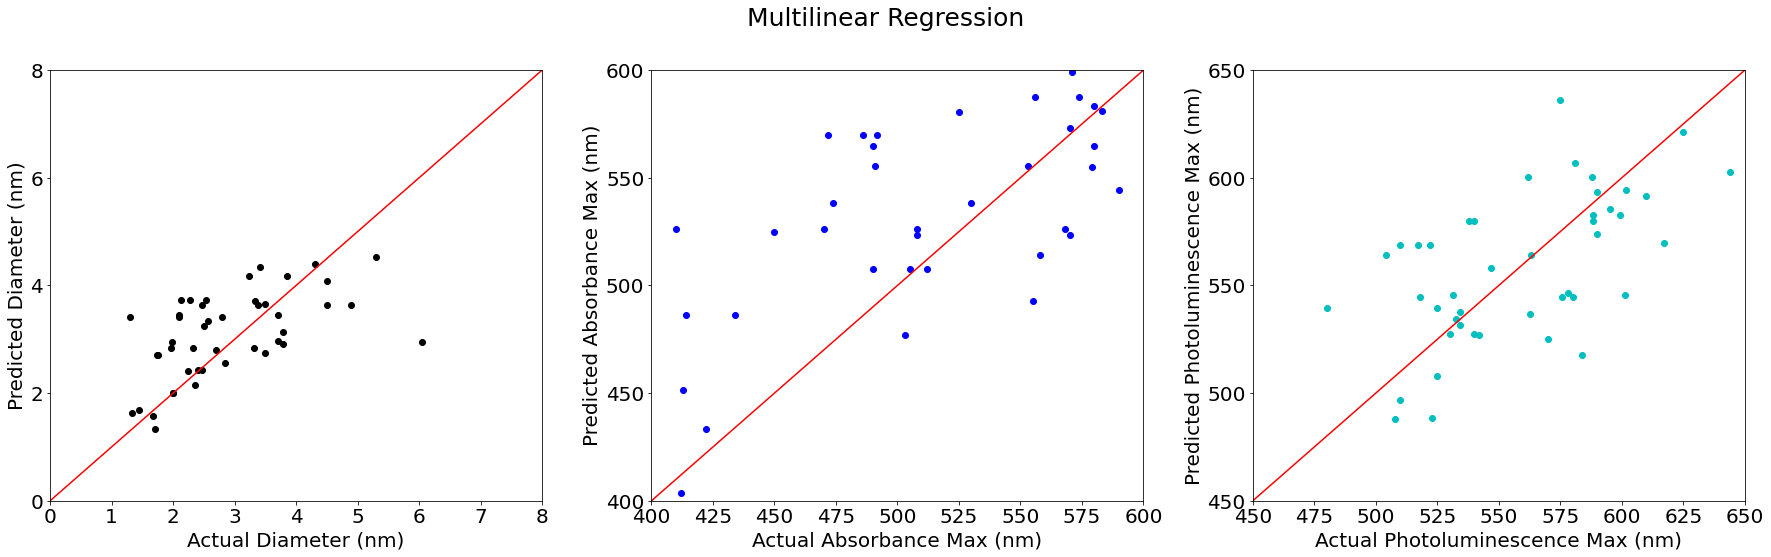

In [8]:
# Plot graphs of the predicted vs actual for each case
matplotlib.rcParams.update({'font.size': 20})

fig, axes = plt.subplots(figsize = (25,8), nrows = 1, ncols =3)
fig.suptitle('Multilinear Regression', fontsize=25)

axes[0].scatter(y_size_test, y_size_predict_linear, color='k')
axes[0].plot([0, 1],[0, 1], transform=axes[0].transAxes, color = 'r')
axes[0].set_xlim(0,8)
axes[0].set_ylim(0,8)
axes[0].set_yticks([0, 2, 4, 6, 8])
axes[0].set_xlabel('Actual Diameter (nm)')
axes[0].set_ylabel('Predicted Diameter (nm)')

axes[1].scatter(y_abs_test, y_abs_predict_linear, color='b')
axes[1].plot([0, 1],[0, 1], transform=axes[1].transAxes, color = 'r')
axes[1].set_xlim(400,600)
axes[1].set_ylim(400,600)
axes[1].set_yticks([400, 450, 500, 550, 600])
axes[1].set_xlabel('Actual Absorbance Max (nm)')
axes[1].set_ylabel('Predicted Absorbance Max (nm)')

axes[2].scatter(y_PL_test, y_PL_predict_linear, color='c')
axes[2].plot([0,1],[0,1], transform=axes[2].transAxes, color = 'r')
axes[2].set_xlim(450, 650)
axes[2].set_ylim(450, 650)
axes[2].set_yticks([450, 500, 550, 600, 650])
axes[2].set_xlabel('Actual Photoluminescence Max (nm)')
axes[2].set_ylabel('Predicted Photoluminescence Max (nm)')

plt.tight_layout()

## 1 b. Ridge

In [9]:
# Creates the 3 Ridge regression objects for each model
ridge_size = Ridge(alpha=0.050800000000000005)
ridge_abs = Ridge(alpha=0.0476)
ridge_PL = Ridge(alpha=0.057800000000000004)

# Use each model to fit the training data
ridge_size.fit(X_size_train,y_size_train)
ridge_abs.fit(X_abs_train,y_abs_train)
ridge_PL.fit(X_PL_train,y_PL_train)

# Use each model to predict the output for the testing dataset
y_size_predict_ridge = ridge_size.predict(X_size_test)
y_abs_predict_ridge = ridge_abs.predict(X_abs_test)
y_PL_predict_ridge = ridge_PL.predict(X_PL_test)

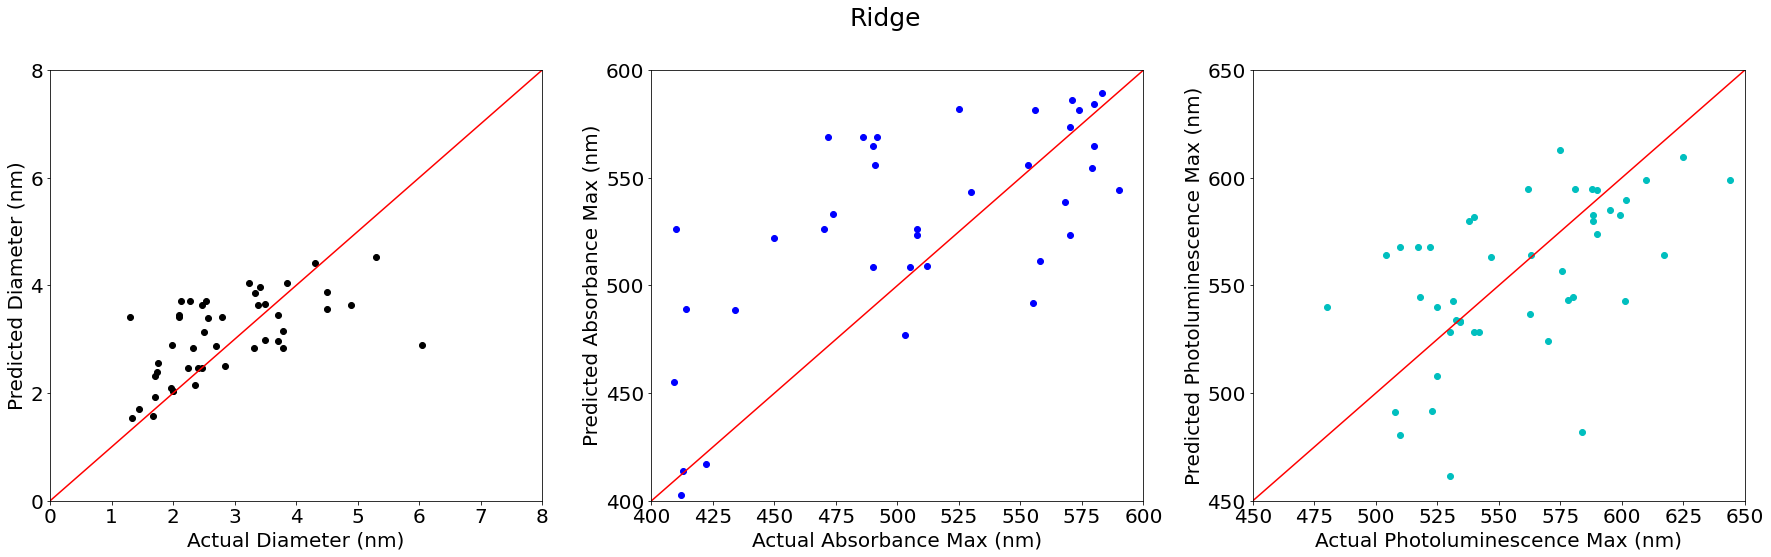

In [10]:
# Plot graphs of the predicted vs actual for each case
matplotlib.rcParams.update({'font.size': 20})

fig, axes = plt.subplots(figsize = (25,8), nrows = 1, ncols =3)
fig.suptitle('Ridge', fontsize=25)

axes[0].scatter(y_size_test, y_size_predict_ridge, color='k')
axes[0].plot([0, 1],[0, 1], transform=axes[0].transAxes, color = 'r')
axes[0].set_xlim(0,8)
axes[0].set_ylim(0,8)
axes[0].set_yticks([0, 2, 4, 6, 8])
axes[0].set_xlabel('Actual Diameter (nm)')
axes[0].set_ylabel('Predicted Diameter (nm)')

axes[1].scatter(y_abs_test, y_abs_predict_ridge, color='b')
axes[1].plot([0, 1],[0, 1], transform=axes[1].transAxes, color = 'r')
axes[1].set_xlim(400,600)
axes[1].set_ylim(400,600)
axes[1].set_yticks([400, 450, 500, 550, 600])
axes[1].set_xlabel('Actual Absorbance Max (nm)')
axes[1].set_ylabel('Predicted Absorbance Max (nm)')

axes[2].scatter(y_PL_test, y_PL_predict_ridge, color='c')
axes[2].plot([0,1],[0,1], transform=axes[2].transAxes, color = 'r')
axes[2].set_xlim(450, 650)
axes[2].set_ylim(450, 650)
axes[2].set_yticks([450, 500, 550, 600, 650])
axes[2].set_xlabel('Actual Photoluminescence Max (nm)')
axes[2].set_ylabel('Predicted Photoluminescence Max (nm)')

plt.tight_layout()

## 1 c. Gradient Boosting

In [11]:
# Creates the 3 linear regression objects for each model
gbm_size = GradientBoostingRegressor(n_estimators=997)
gbm_abs = GradientBoostingRegressor(n_estimators=304)
gbm_PL = GradientBoostingRegressor(n_estimators=183)

# Use each model to fit the training data
gbm_size.fit(X_size_train,y_size_train)
gbm_abs.fit(X_abs_train, y_abs_train)
gbm_PL.fit(X_PL_train, y_PL_train)

# Use each model to predict the output for the testing dataset
y_size_predict_gbm = gbm_size.predict(X_size_test)
y_abs_predict_gbm = gbm_abs.predict(X_abs_test)
y_PL_predict_gbm = gbm_PL.predict(X_PL_test)

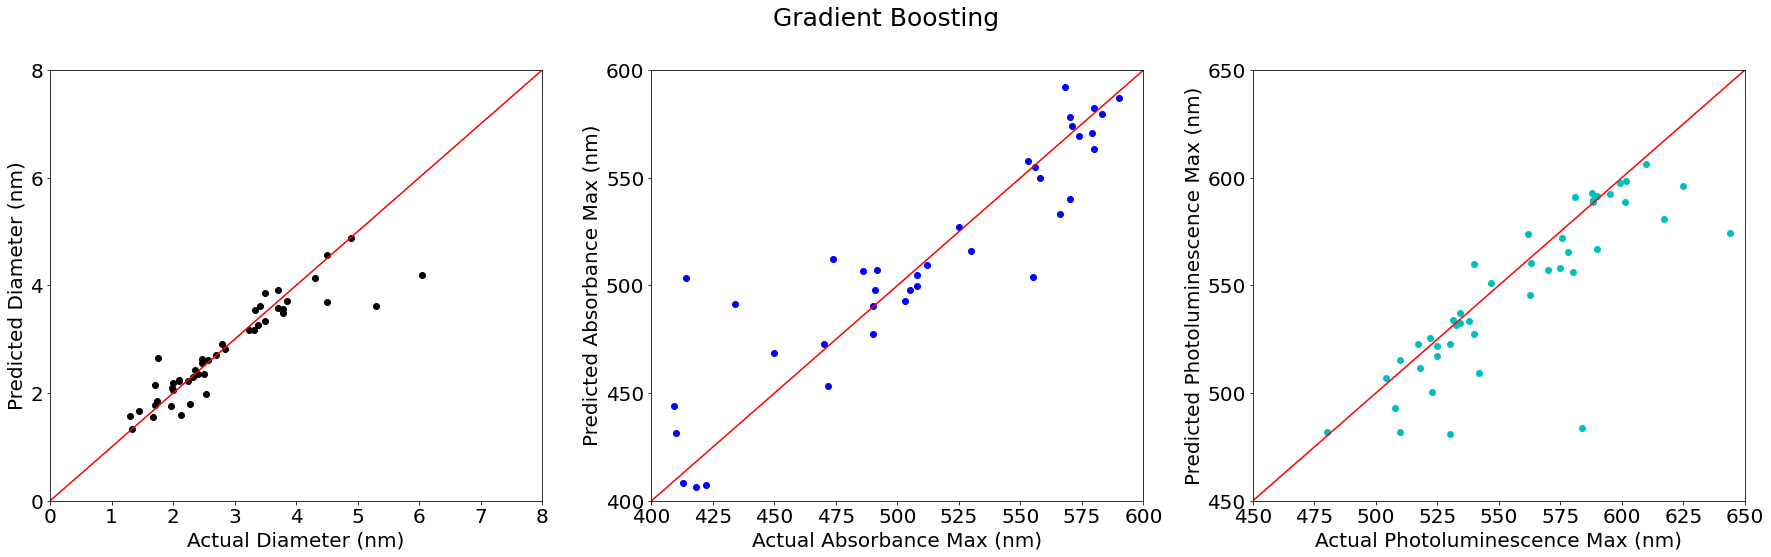

In [12]:
# Plot graphs of the predicted vs actual for each case
matplotlib.rcParams.update({'font.size': 20})

fig, axes = plt.subplots(figsize = (25,8), nrows = 1, ncols =3)
fig.suptitle('Gradient Boosting', fontsize=25)

axes[0].scatter(y_size_test, y_size_predict_gbm, color='k')
axes[0].plot([0, 1],[0, 1], transform=axes[0].transAxes, color = 'r')
axes[0].set_xlim(0,8)
axes[0].set_ylim(0,8)
axes[0].set_yticks([0, 2, 4, 6, 8])
axes[0].set_xlabel('Actual Diameter (nm)')
axes[0].set_ylabel('Predicted Diameter (nm)')

axes[1].scatter(y_abs_test, y_abs_predict_gbm, color='b')
axes[1].plot([0, 1],[0, 1], transform=axes[1].transAxes, color = 'r')
axes[1].set_xlim(400,600)
axes[1].set_ylim(400,600)
axes[1].set_yticks([400, 450, 500, 550, 600])
axes[1].set_xlabel('Actual Absorbance Max (nm)')
axes[1].set_ylabel('Predicted Absorbance Max (nm)')

axes[2].scatter(y_PL_test, y_PL_predict_gbm, color='c')
axes[2].plot([0,1],[0,1], transform=axes[2].transAxes, color = 'r')
axes[2].set_xlim(450, 650)
axes[2].set_ylim(450, 650)
axes[2].set_yticks([450, 500, 550, 600, 650])
axes[2].set_xlabel('Actual Photoluminescence Max (nm)')
axes[2].set_ylabel('Predicted Photoluminescence Max (nm)')

plt.tight_layout()

## 1 d. K Neighbors

In [13]:
# Creates the 3 linear regression objects for each model
knn_size = KNeighborsRegressor(n_neighbors=1)
knn_abs = KNeighborsRegressor(n_neighbors=1)
knn_PL = KNeighborsRegressor(n_neighbors=1)

# Use each model to fit the training data
knn_size.fit(X_size_train,y_size_train)
knn_abs.fit(X_abs_train, y_abs_train)
knn_PL.fit(X_PL_train, y_PL_train)

# Use each model to predict the output for the testing dataset
y_size_predict_knn = knn_size.predict(X_size_test)
y_abs_predict_knn = knn_abs.predict(X_abs_test)
y_PL_predict_knn = knn_PL.predict(X_PL_test)

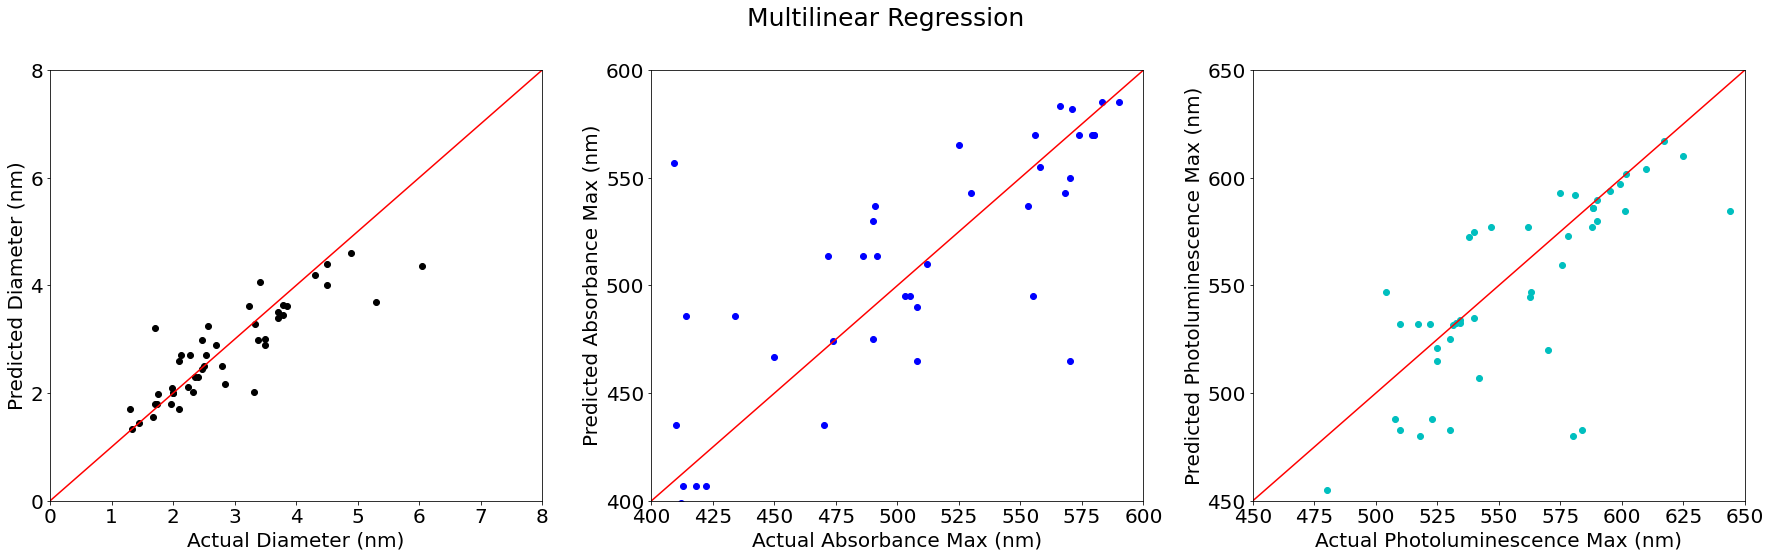

In [14]:
# Plot graphs of the predicted vs actual for each case
matplotlib.rcParams.update({'font.size': 20})

fig, axes = plt.subplots(figsize = (25,8), nrows = 1, ncols =3)
fig.suptitle('Multilinear Regression', fontsize=25)

axes[0].scatter(y_size_test, y_size_predict_knn, color='k')
axes[0].plot([0, 1],[0, 1], transform=axes[0].transAxes, color = 'r')
axes[0].set_xlim(0,8)
axes[0].set_ylim(0,8)
axes[0].set_yticks([0, 2, 4, 6, 8])
axes[0].set_xlabel('Actual Diameter (nm)')
axes[0].set_ylabel('Predicted Diameter (nm)')

axes[1].scatter(y_abs_test, y_abs_predict_knn, color='b')
axes[1].plot([0, 1],[0, 1], transform=axes[1].transAxes, color = 'r')
axes[1].set_xlim(400,600)
axes[1].set_ylim(400,600)
axes[1].set_yticks([400, 450, 500, 550, 600])
axes[1].set_xlabel('Actual Absorbance Max (nm)')
axes[1].set_ylabel('Predicted Absorbance Max (nm)')

axes[2].scatter(y_PL_test, y_PL_predict_knn, color='c')
axes[2].plot([0,1],[0,1], transform=axes[2].transAxes, color = 'r')
axes[2].set_xlim(450, 650)
axes[2].set_ylim(450, 650)
axes[2].set_yticks([450, 500, 550, 600, 650])
axes[2].set_xlabel('Actual Photoluminescence Max (nm)')
axes[2].set_ylabel('Predicted Photoluminescence Max (nm)')

plt.tight_layout()

## 1 e. SVR(kernel ='linear')

In [15]:
# Creates the 3 linear regression objects for each model
svr_size = SVR(kernel='linear')
svr_abs = SVR(kernel='linear')
svr_PL = SVR(kernel='linear')

# Use each model to fit the training data
svr_size.fit(X_size_train,y_size_train)
svr_abs.fit(X_abs_train, y_abs_train)
svr_PL.fit(X_PL_train, y_PL_train)

# Use each model to predict the output for the testing dataset
y_size_predict_svr = svr_size.predict(X_size_test)
y_abs_predict_svr = svr_abs.predict(X_abs_test)
y_PL_predict_svr = svr_PL.predict(X_PL_test)

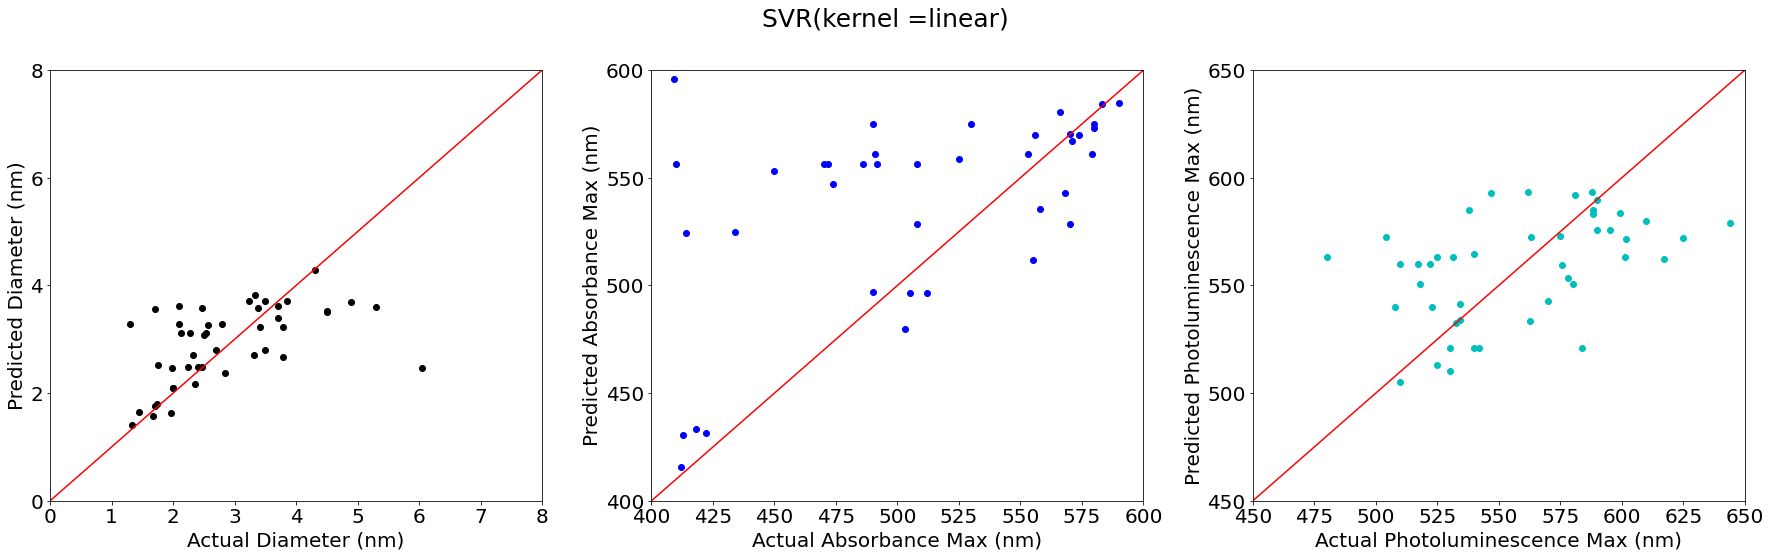

In [16]:
# Plot graphs of the predicted vs actual for each case
matplotlib.rcParams.update({'font.size': 20})

fig, axes = plt.subplots(figsize = (25,8), nrows = 1, ncols =3)
fig.suptitle('SVR(kernel =linear)', fontsize=25)

axes[0].scatter(y_size_test, y_size_predict_svr, color='k')
axes[0].plot([0, 1],[0, 1], transform=axes[0].transAxes, color = 'r')
axes[0].set_xlim(0,8)
axes[0].set_ylim(0,8)
axes[0].set_yticks([0, 2, 4, 6, 8])
axes[0].set_xlabel('Actual Diameter (nm)')
axes[0].set_ylabel('Predicted Diameter (nm)')

axes[1].scatter(y_abs_test, y_abs_predict_svr, color='b')
axes[1].plot([0, 1],[0, 1], transform=axes[1].transAxes, color = 'r')
axes[1].set_xlim(400,600)
axes[1].set_ylim(400,600)
axes[1].set_yticks([400, 450, 500, 550, 600])
axes[1].set_xlabel('Actual Absorbance Max (nm)')
axes[1].set_ylabel('Predicted Absorbance Max (nm)')

axes[2].scatter(y_PL_test, y_PL_predict_svr, color='c')
axes[2].plot([0,1],[0,1], transform=axes[2].transAxes, color = 'r')
axes[2].set_xlim(450, 650)
axes[2].set_ylim(450, 650)
axes[2].set_yticks([450, 500, 550, 600, 650])
axes[2].set_xlabel('Actual Photoluminescence Max (nm)')
axes[2].set_ylabel('Predicted Photoluminescence Max (nm)')

plt.tight_layout()

## 1 f. SVR(kernel ='rbf')

In [17]:
# Creates the 3 linear regression objects for each model
rbf_size = SVR(kernel='rbf')
rbf_abs = SVR(kernel='rbf')
rbf_PL = SVR(kernel='rbf')

# Use each model to fit the training data
rbf_size.fit(X_size_train,y_size_train)
rbf_abs.fit(X_abs_train, y_abs_train)
rbf_PL.fit(X_PL_train, y_PL_train)

# Use each model to predict the output for the testing dataset
y_size_predict_rbf = rbf_size.predict(X_size_test)
y_abs_predict_rbf = rbf_abs.predict(X_abs_test)
y_PL_predict_rbf = rbf_PL.predict(X_PL_test)

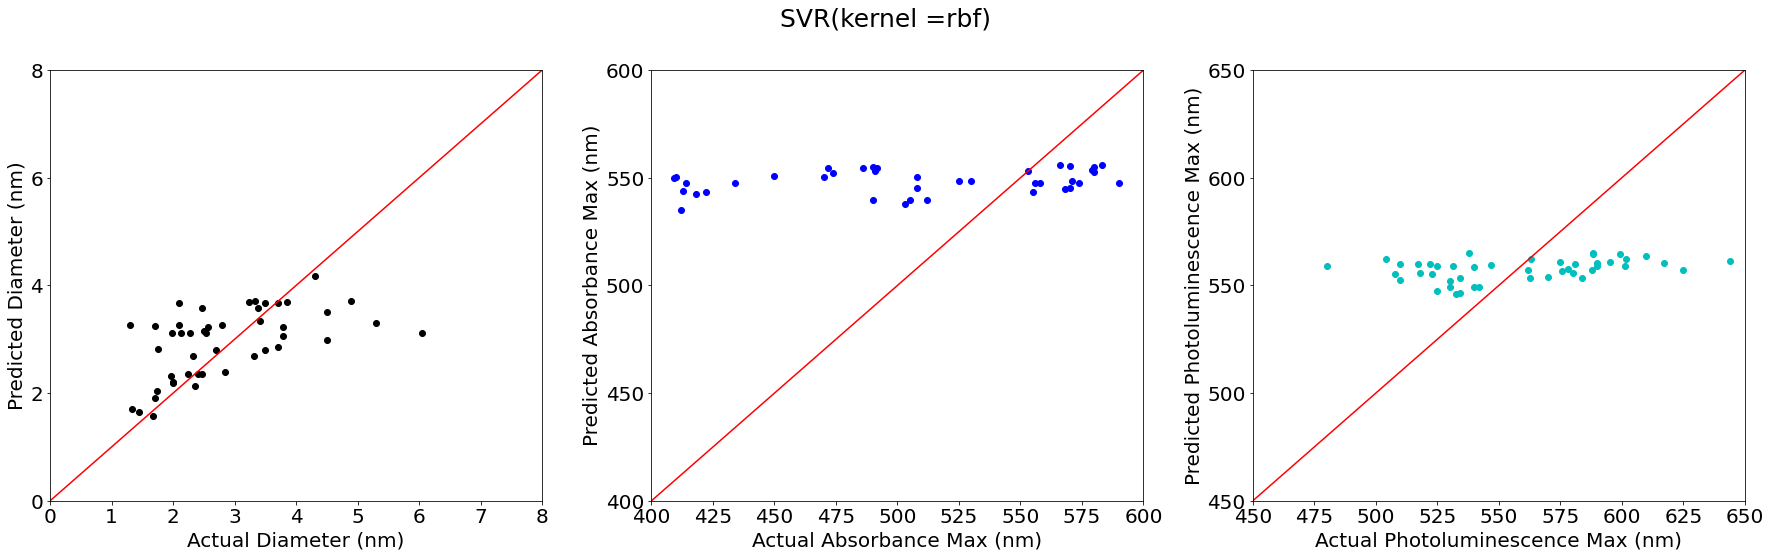

In [18]:
# Plot graphs of the predicted vs actual for each case
matplotlib.rcParams.update({'font.size': 20})

fig, axes = plt.subplots(figsize = (25,8), nrows = 1, ncols =3)
fig.suptitle('SVR(kernel =rbf)', fontsize=25)

axes[0].scatter(y_size_test, y_size_predict_rbf, color='k')
axes[0].plot([0, 1],[0, 1], transform=axes[0].transAxes, color = 'r')
axes[0].set_xlim(0,8)
axes[0].set_ylim(0,8)
axes[0].set_yticks([0, 2, 4, 6, 8])
axes[0].set_xlabel('Actual Diameter (nm)')
axes[0].set_ylabel('Predicted Diameter (nm)')

axes[1].scatter(y_abs_test, y_abs_predict_rbf, color='b')
axes[1].plot([0, 1],[0, 1], transform=axes[1].transAxes, color = 'r')
axes[1].set_xlim(400,600)
axes[1].set_ylim(400,600)
axes[1].set_yticks([400, 450, 500, 550, 600])
axes[1].set_xlabel('Actual Absorbance Max (nm)')
axes[1].set_ylabel('Predicted Absorbance Max (nm)')

axes[2].scatter(y_PL_test, y_PL_predict_rbf, color='c')
axes[2].plot([0,1],[0,1], transform=axes[2].transAxes, color = 'r')
axes[2].set_xlim(450, 650)
axes[2].set_ylim(450, 650)
axes[2].set_yticks([450, 500, 550, 600, 650])
axes[2].set_xlabel('Actual Photoluminescence Max (nm)')
axes[2].set_ylabel('Predicted Photoluminescence Max (nm)')

plt.tight_layout()

## 1 g. Decision Tree

In [19]:
# Creates the 3 linear regression objects for each model
regr_size = DecisionTreeRegressor()
regr_abs = DecisionTreeRegressor()
regr_PL = DecisionTreeRegressor()

# Use each model to fit the training data
regr_size.fit(X_size_train,y_size_train)
regr_abs.fit(X_abs_train, y_abs_train)
regr_PL.fit(X_PL_train, y_PL_train)

# Use each model to predict the output for the testing dataset
y_size_predict_dec = regr_size.predict(X_size_test)
y_abs_predict_dec = regr_abs.predict(X_abs_test)
y_PL_predict_dec= regr_PL.predict(X_PL_test)

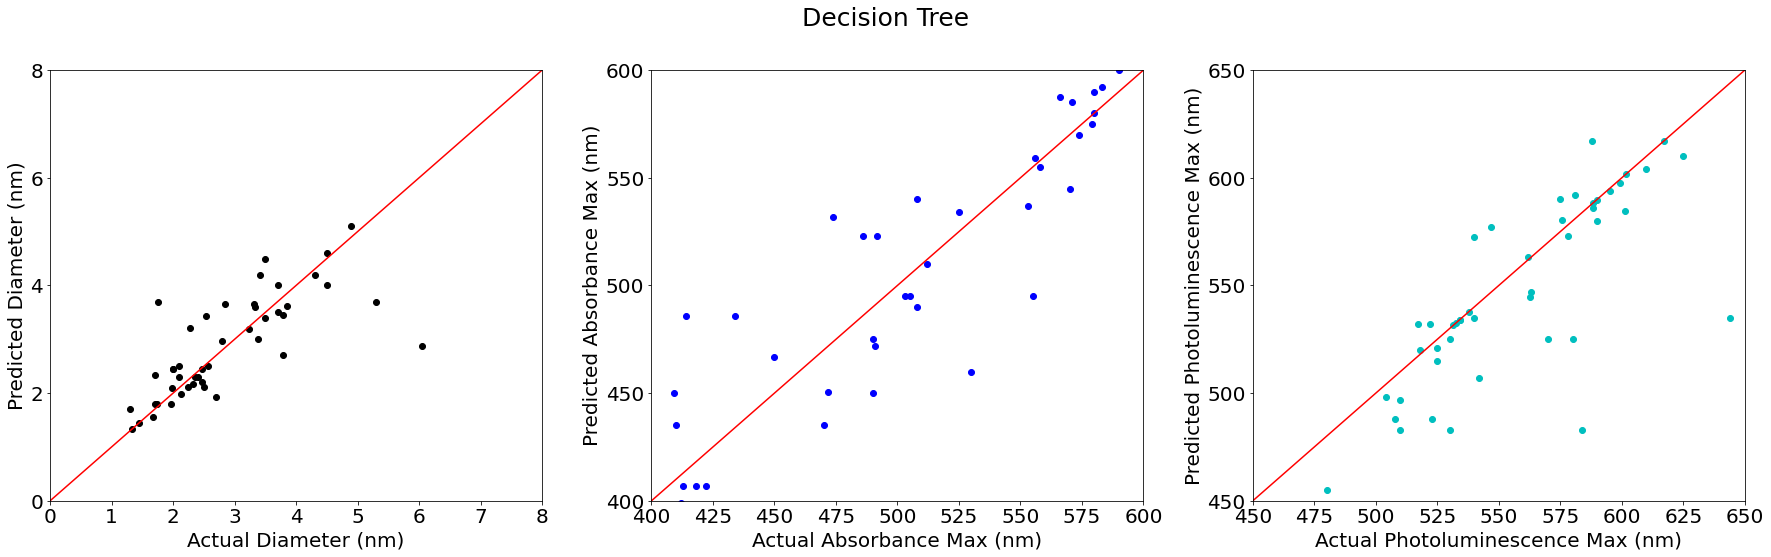

In [20]:
# Plot graphs of the predicted vs actual for each case
matplotlib.rcParams.update({'font.size': 20})

fig, axes = plt.subplots(figsize = (25,8), nrows = 1, ncols =3)
fig.suptitle('Decision Tree', fontsize=25)

axes[0].scatter(y_size_test, y_size_predict_dec, color='k')
axes[0].plot([0, 1],[0, 1], transform=axes[0].transAxes, color = 'r')
axes[0].set_xlim(0,8)
axes[0].set_ylim(0,8)
axes[0].set_yticks([0, 2, 4, 6, 8])
axes[0].set_xlabel('Actual Diameter (nm)')
axes[0].set_ylabel('Predicted Diameter (nm)')

axes[1].scatter(y_abs_test, y_abs_predict_dec, color='b')
axes[1].plot([0, 1],[0, 1], transform=axes[1].transAxes, color = 'r')
axes[1].set_xlim(400,600)
axes[1].set_ylim(400,600)
axes[1].set_yticks([400, 450, 500, 550, 600])
axes[1].set_xlabel('Actual Absorbance Max (nm)')
axes[1].set_ylabel('Predicted Absorbance Max (nm)')

axes[2].scatter(y_PL_test, y_PL_predict_dec, color='c')
axes[2].plot([0,1],[0,1], transform=axes[2].transAxes, color = 'r')
axes[2].set_xlim(450, 650)
axes[2].set_ylim(450, 650)
axes[2].set_yticks([450, 500, 550, 600, 650])
axes[2].set_xlabel('Actual Photoluminescence Max (nm)')
axes[2].set_ylabel('Predicted Photoluminescence Max (nm)')

plt.tight_layout()

## 1 h. Random Forest

In [21]:
# Creates the 3 linear regression objects for each model
clf_RF_size = RandomForestRegressor(n_estimators=50,random_state=8)
clf_RF_abs = RandomForestRegressor(n_estimators=50,random_state=8)
clf_RF_PL = RandomForestRegressor(n_estimators=50,random_state=8)

# Use each model to fit the training data
clf_RF_size.fit(X_size_train,y_size_train)
clf_RF_abs.fit(X_abs_train, y_abs_train)
clf_RF_PL.fit(X_PL_train, y_PL_train)

# Use each model to predict the output for the testing dataset
y_size_predict_RF = clf_RF_size.predict(X_size_test)
y_abs_predict_RF = clf_RF_abs.predict(X_abs_test)
y_PL_predict_RF= clf_RF_PL.predict(X_PL_test)

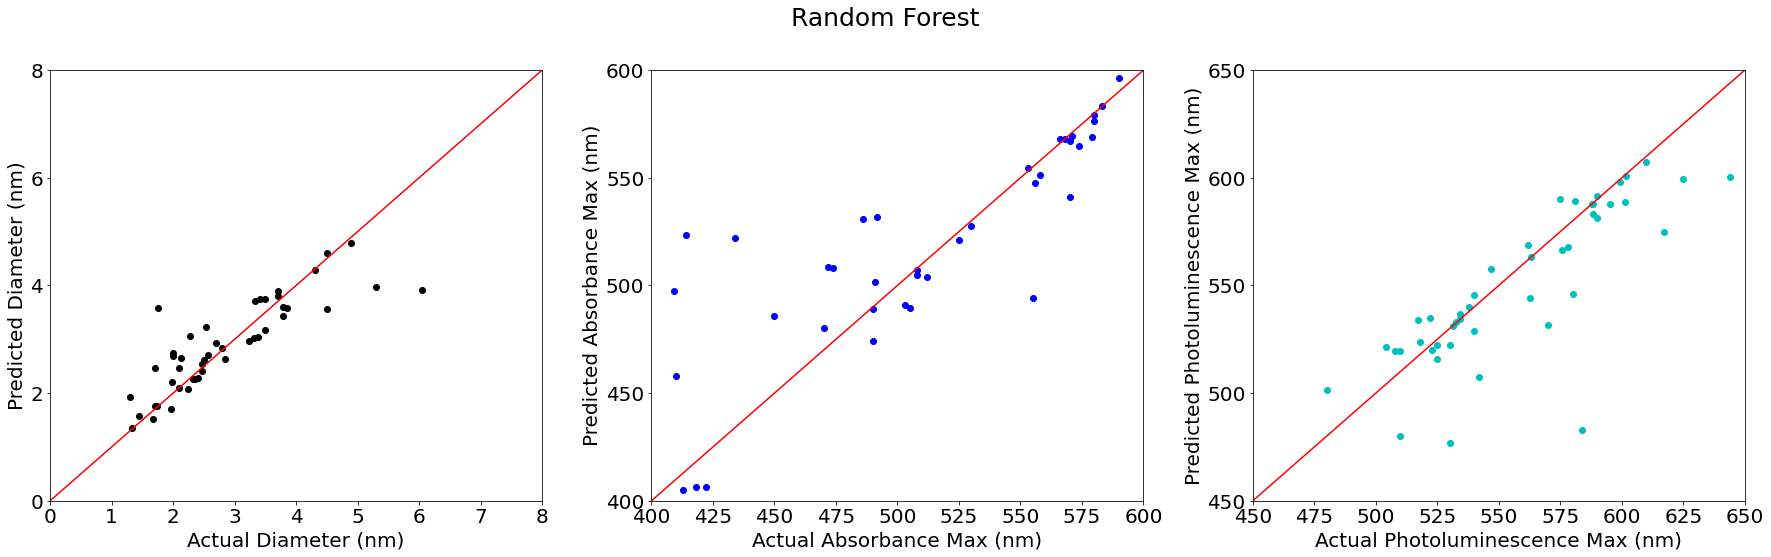

In [22]:
# Plot graphs of the predicted vs actual for each case
matplotlib.rcParams.update({'font.size': 20})

fig, axes = plt.subplots(figsize = (25,8), nrows = 1, ncols =3)
fig.suptitle('Random Forest', fontsize=25)

axes[0].scatter(y_size_test, y_size_predict_RF, color='k')
axes[0].plot([0, 1],[0, 1], transform=axes[0].transAxes, color = 'r')
axes[0].set_xlim(0,8)
axes[0].set_ylim(0,8)
axes[0].set_yticks([0, 2, 4, 6, 8])
axes[0].set_xlabel('Actual Diameter (nm)')
axes[0].set_ylabel('Predicted Diameter (nm)')

axes[1].scatter(y_abs_test, y_abs_predict_RF, color='b')
axes[1].plot([0, 1],[0, 1], transform=axes[1].transAxes, color = 'r')
axes[1].set_xlim(400,600)
axes[1].set_ylim(400,600)
axes[1].set_yticks([400, 450, 500, 550, 600])
axes[1].set_xlabel('Actual Absorbance Max (nm)')
axes[1].set_ylabel('Predicted Absorbance Max (nm)')

axes[2].scatter(y_PL_test, y_PL_predict_RF, color='c')
axes[2].plot([0,1],[0,1], transform=axes[2].transAxes, color = 'r')
axes[2].set_xlim(450, 650)
axes[2].set_ylim(450, 650)
axes[2].set_yticks([450, 500, 550, 600, 650])
axes[2].set_xlabel('Actual Photoluminescence Max (nm)')
axes[2].set_ylabel('Predicted Photoluminescence Max (nm)')

plt.tight_layout()

## 2. Multioutput Analysis

In [23]:
X = data.drop(columns =['Unnamed: 0','Unnamed: 0.1','Diameter_nm','Absorbance max (nm)', 'PL max (nm)'], 
                  inplace = False, axis = 1) #keep synthesis parameters that matter
output_col = ['Diameter_nm','Absorbance max (nm)', 'PL max (nm)']
y = data[output_col]
#y = data['Diameter_nm','Absorbance max (nm)', 'PL max (nm)'] #will predict diameter, absorbance, and PL.values 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, shuffle=True)

## 2 a. Extra Trees

In [25]:
ET_reg = ExtraTreesRegressor(n_estimators=3,
                            max_features=8,     
                            random_state=44).fit(X_train, y_train)
ET_y_pred = ET_reg.predict(X_test)

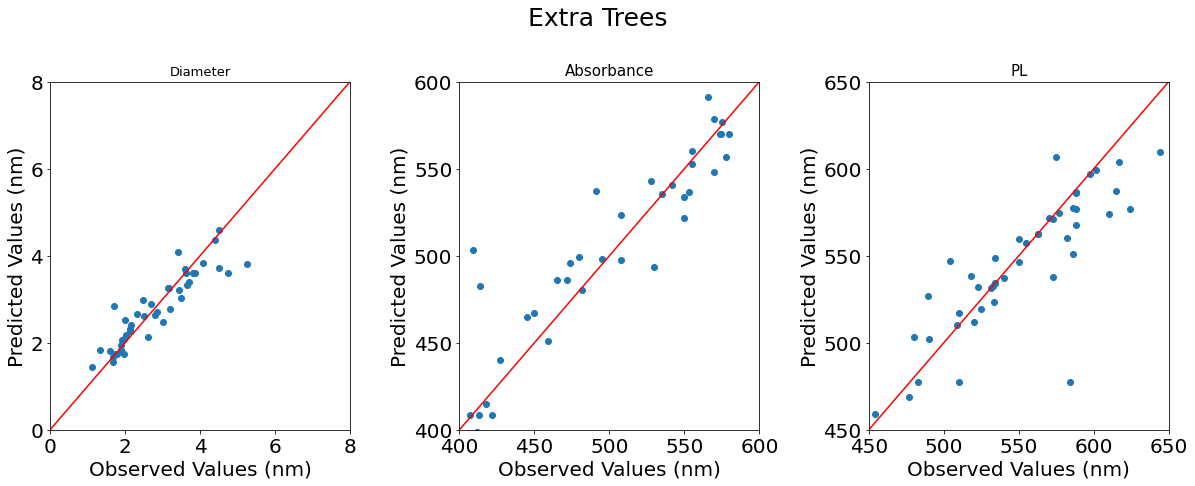

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('Extra Trees', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(ET_y_pred).loc[:, 0],'o')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax1.plot([0, 1],[0, 1], transform=ax1.transAxes, color = 'r')
ax1.set_xlim(0,8)
ax1.set_ylim(0,8)
ax1.set_yticks([0, 2, 4, 6, 8])

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(ET_y_pred).loc[:, 1],'o')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax2.plot([0, 1],[0, 1], transform=ax2.transAxes, color = 'r')
ax2.set_xlim(400,600)
ax2.set_ylim(400,600)
ax2.set_yticks([400, 450, 500, 550, 600])

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(ET_y_pred).loc[:, 2],'o')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax3.plot([0,1],[0,1], transform=ax3.transAxes, color = 'r')
ax3.set_xlim(450, 650)
ax3.set_ylim(450, 650)
ax3.set_yticks([450, 500, 550, 600, 650])
fig.tight_layout()

## 2 b. Lasso

In [27]:
L_reg = Lasso(alpha=0.1, random_state=1).fit(X_train, y_train)
            
L_y_pred = L_reg.predict(X_test)

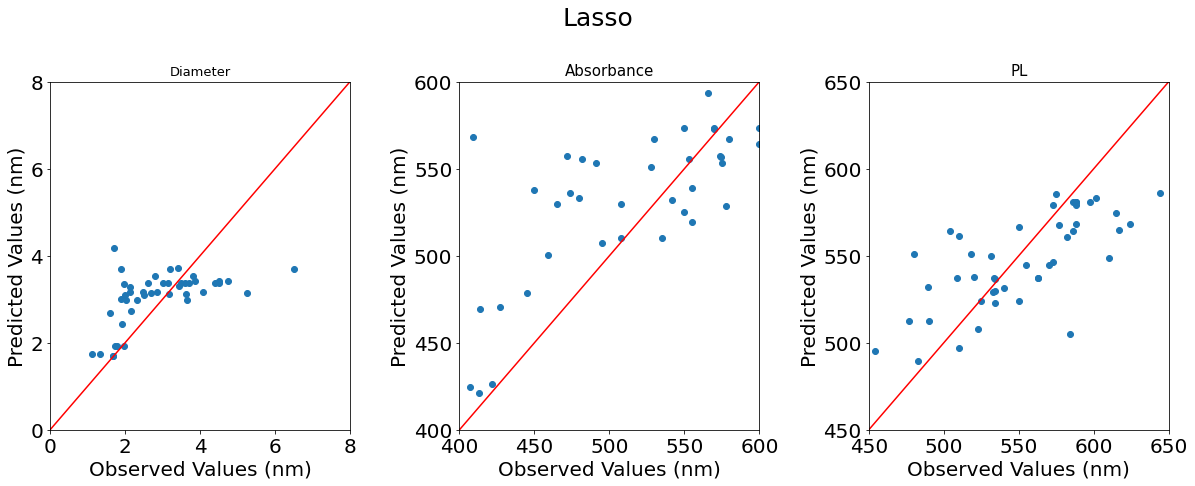

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('Lasso', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(L_y_pred).loc[:, 0],'o')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax1.plot([0, 1],[0, 1], transform=ax1.transAxes, color = 'r')
ax1.set_xlim(0,8)
ax1.set_ylim(0,8)
ax1.set_yticks([0, 2, 4, 6, 8])

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(L_y_pred).loc[:, 1],'o')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax2.plot([0, 1],[0, 1], transform=ax2.transAxes, color = 'r')
ax2.set_xlim(400,600)
ax2.set_ylim(400,600)
ax2.set_yticks([400, 450, 500, 550, 600])


ax3.plot(y_test.iloc[:, 2], pd.DataFrame(L_y_pred).loc[:, 2],'o')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax3.plot([0,1],[0,1], transform=ax3.transAxes, color = 'r')
ax3.set_xlim(450, 650)
ax3.set_ylim(450, 650)
ax3.set_yticks([450, 500, 550, 600, 650])
fig.tight_layout()

## 2 c. Decision Tree

In [29]:
DT_reg = DecisionTreeRegressor(max_depth=12, max_features=11, 
                      random_state=55, max_leaf_nodes=48).fit(X_train, y_train)

DT_y_pred = DT_reg.predict(X_test)

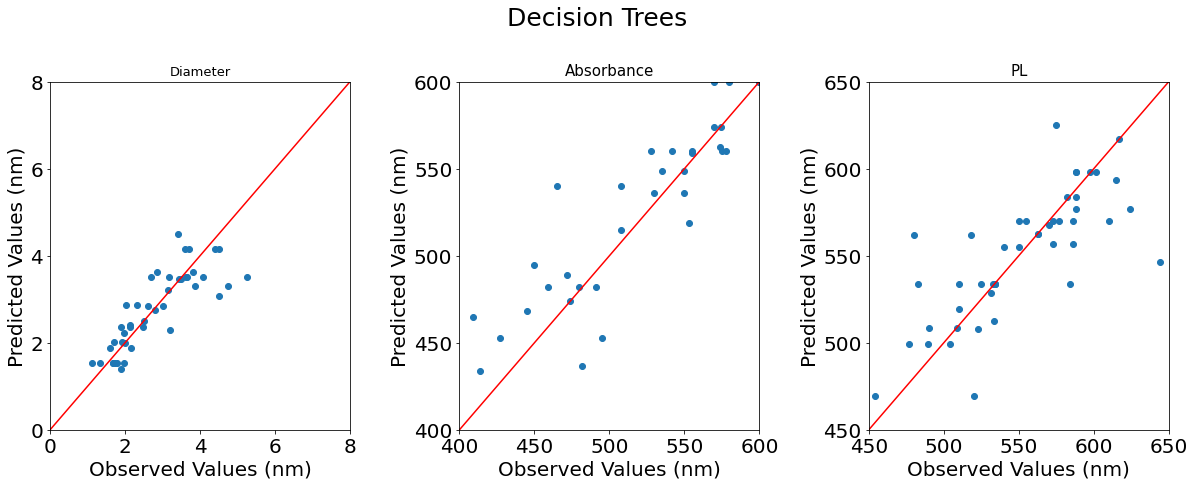

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('Decision Trees', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(DT_y_pred).loc[:, 0],'o')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax1.plot([0, 1],[0, 1], transform=ax1.transAxes, color = 'r')
ax1.set_xlim(0,8)
ax1.set_ylim(0,8)
ax1.set_yticks([0, 2, 4, 6, 8])

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(DT_y_pred).loc[:, 1],'o')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax2.plot([0, 1],[0, 1], transform=ax2.transAxes, color = 'r')
ax2.set_xlim(400,600)
ax2.set_ylim(400,600)
ax2.set_yticks([400, 450, 500, 550, 600])

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(DT_y_pred).loc[:, 2],'o')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax3.plot([0,1],[0,1], transform=ax3.transAxes, color = 'r')
ax3.set_xlim(450, 650)
ax3.set_ylim(450, 650)
ax3.set_yticks([450, 500, 550, 600, 650])
fig.tight_layout()

## 2 d. Random forest

In [31]:
RF_reg = RandomForestRegressor(max_depth=13, 
                               n_estimators=5, 
                               max_features=14,
                               random_state=57).fit(X_train, y_train)
            
RF_y_pred = RF_reg.predict(X_test)

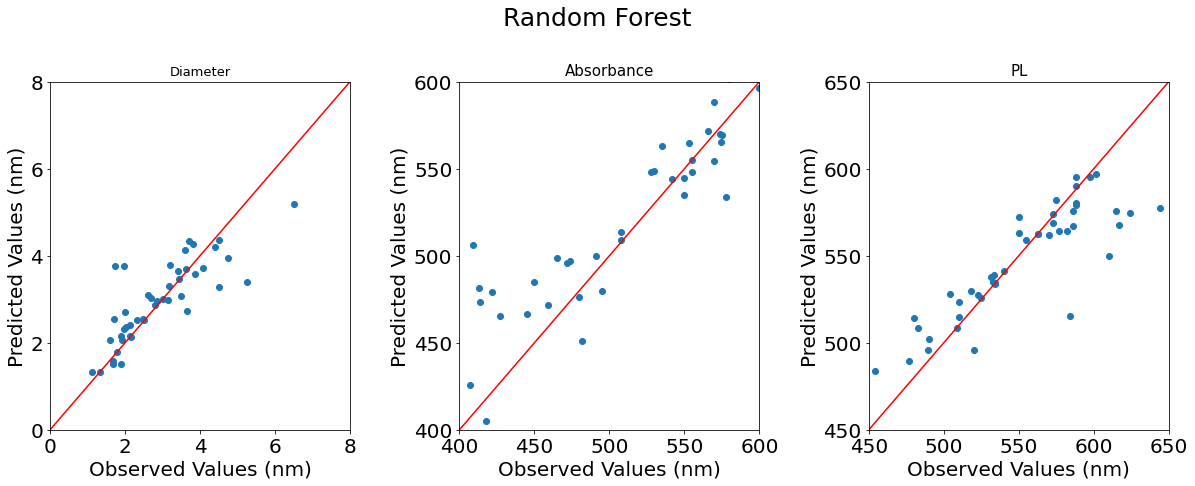

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('Random Forest', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(RF_y_pred).loc[:, 0],'o')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax1.plot([0, 1],[0, 1], transform=ax1.transAxes, color = 'r')
ax1.set_xlim(0,8)
ax1.set_ylim(0,8)
ax1.set_yticks([0, 2, 4, 6, 8])

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(RF_y_pred).loc[:, 1],'o')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax2.plot([0, 1],[0, 1], transform=ax2.transAxes, color = 'r')
ax2.set_xlim(400,600)
ax2.set_ylim(400,600)
ax2.set_yticks([400, 450, 500, 550, 600])

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(RF_y_pred).loc[:, 2],'o')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax3.plot([0,1],[0,1], transform=ax3.transAxes, color = 'r')
ax3.set_xlim(450, 650)
ax3.set_ylim(450, 650)
ax3.set_yticks([450, 500, 550, 600, 650])
fig.tight_layout()

## 2 e. Ada Boost Regressor

In [33]:
AB_reg = MultiOutputRegressor(AdaBoostRegressor(n_estimators=12 ,
                                                learning_rate=0.34, 
                                                loss='exponential', 
                                                random_state=47)).fit(X_train, y_train)

AB_y_pred = AB_reg.predict(X_test)

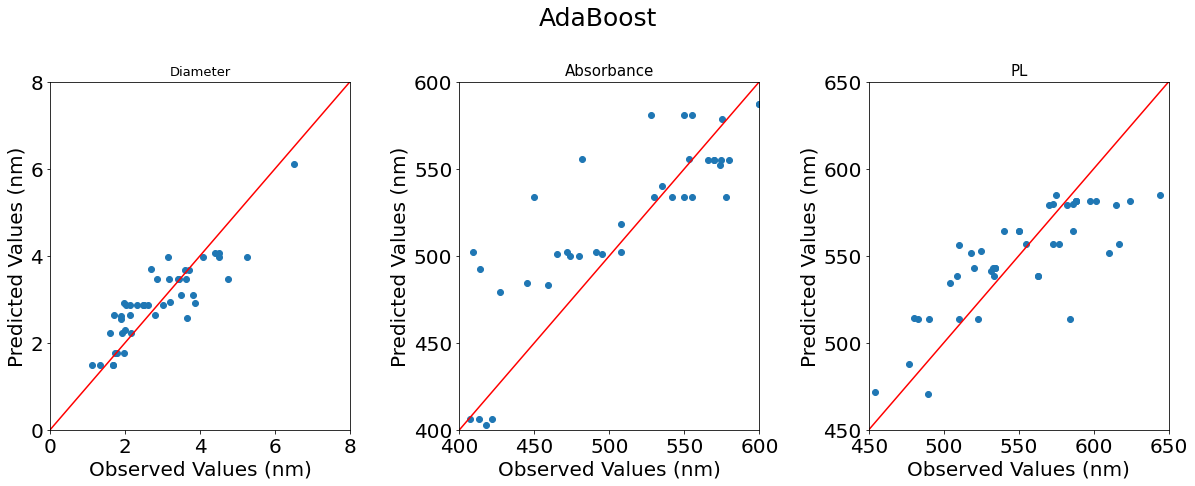

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('AdaBoost', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(AB_y_pred).loc[:, 0],'o')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax1.plot([0, 1],[0, 1], transform=ax1.transAxes, color = 'r')
ax1.set_xlim(0,8)
ax1.set_ylim(0,8)
ax1.set_yticks([0, 2, 4, 6, 8])

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(AB_y_pred).loc[:, 1],'o')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax2.plot([0, 1],[0, 1], transform=ax2.transAxes, color = 'r')
ax2.set_xlim(400,600)
ax2.set_ylim(400,600)
ax2.set_yticks([400, 450, 500, 550, 600])

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(AB_y_pred).loc[:, 2],'o')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax3.plot([0,1],[0,1], transform=ax3.transAxes, color = 'r')
ax3.set_xlim(450, 650)
ax3.set_ylim(450, 650)
ax3.set_yticks([450, 500, 550, 600, 650])
fig.tight_layout()

## 2 f. Ridge

In [35]:
R_reg = Ridge(alpha=0.06, 
              random_state=30).fit(X_train, y_train)

R_y_pred = R_reg.predict(X_test)

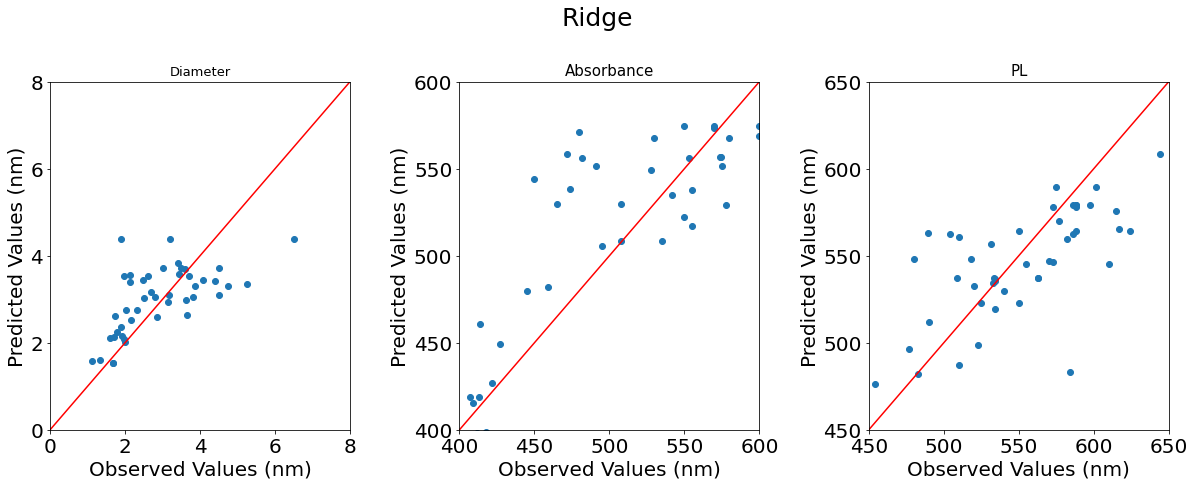

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('Ridge', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(R_y_pred).loc[:, 0],'o')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax1.plot([0, 1],[0, 1], transform=ax1.transAxes, color = 'r')
ax1.set_xlim(0,8)
ax1.set_ylim(0,8)
ax1.set_yticks([0, 2, 4, 6, 8])

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(R_y_pred).loc[:, 1],'o')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax2.plot([0, 1],[0, 1], transform=ax2.transAxes, color = 'r')
ax2.set_xlim(400,600)
ax2.set_ylim(400,600)
ax2.set_yticks([400, 450, 500, 550, 600])

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(R_y_pred).loc[:, 2],'o')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax3.plot([0,1],[0,1], transform=ax3.transAxes, color = 'r')
ax3.set_xlim(450, 650)
ax3.set_ylim(450, 650)
ax3.set_yticks([450, 500, 550, 600, 650])
fig.tight_layout()

## 2 g. Ridge Cross Validation

In [37]:
RCV_reg = RidgeCV(alphas=0.07).fit(X_train, y_train)

RCV_y_pred = RCV_reg.predict(X_test)

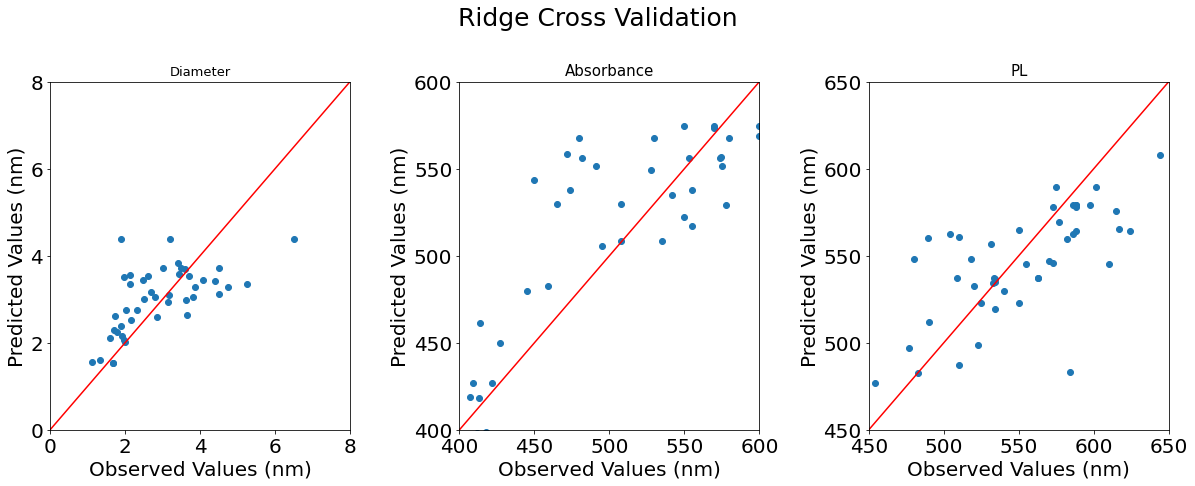

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('Ridge Cross Validation', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(RCV_y_pred).loc[:, 0],'o')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax1.plot([0, 1],[0, 1], transform=ax1.transAxes, color = 'r')
ax1.set_xlim(0,8)
ax1.set_ylim(0,8)
ax1.set_yticks([0, 2, 4, 6, 8])

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(RCV_y_pred).loc[:, 1],'o')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax2.plot([0, 1],[0, 1], transform=ax2.transAxes, color = 'r')
ax2.set_xlim(400,600)
ax2.set_ylim(400,600)
ax2.set_yticks([400, 450, 500, 550, 600])

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(RCV_y_pred).loc[:, 2],'o')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax3.plot([0,1],[0,1], transform=ax3.transAxes, color = 'r')
ax3.set_xlim(450, 650)
ax3.set_ylim(450, 650)
ax3.set_yticks([450, 500, 550, 600, 650])
fig.tight_layout()

## 2 h. K Neighbors

In [39]:
KNN_reg = KNeighborsRegressor(n_neighbors=2, 
                              p=4).fit(X_train, y_train)

KNN_y_pred = KNN_reg.predict(X_test)

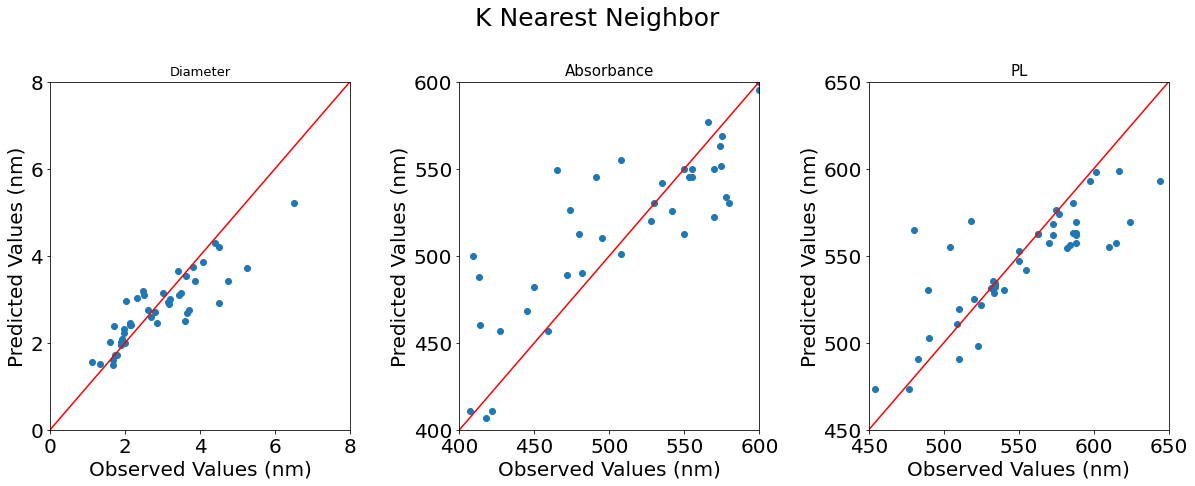

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('K Nearest Neighbor', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(KNN_y_pred).loc[:, 0],'o')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax1.plot([0, 1],[0, 1], transform=ax1.transAxes, color = 'r')
ax1.set_xlim(0,8)
ax1.set_ylim(0,8)
ax1.set_yticks([0, 2, 4, 6, 8])

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(KNN_y_pred).loc[:, 1],'o')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax2.plot([0, 1],[0, 1], transform=ax2.transAxes, color = 'r')
ax2.set_xlim(400,600)
ax2.set_ylim(400,600)
ax2.set_yticks([400, 450, 500, 550, 600])

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(KNN_y_pred).loc[:, 2],'o')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
ax3.plot([0,1],[0,1], transform=ax3.transAxes, color = 'r')
ax3.set_xlim(450, 650)
ax3.set_ylim(450, 650)
ax3.set_yticks([450, 500, 550, 600, 650])
fig.tight_layout()

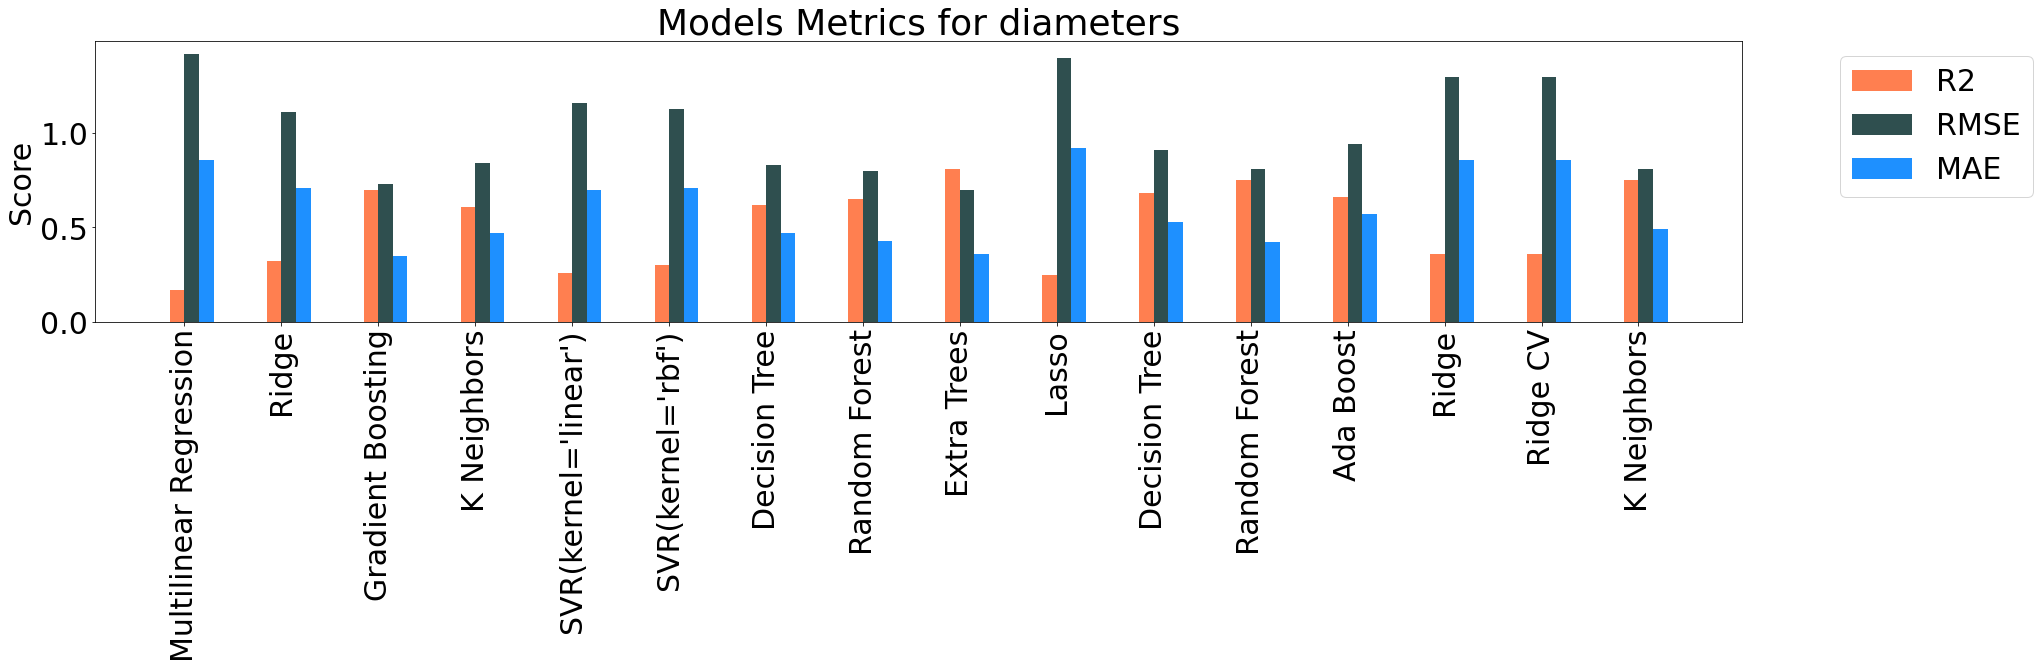

In [5]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
# Import plotting libraries
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 30})
from IPython.display import clear_output

df = pd.read_csv("Models_Metrics.csv")
df



fig, ax = plt.subplots(figsize=(25,10))
# The x-values of the bars.
models = df['Models']
x = np.arange(len(models))
# The width of the bars (1 = the whole width of the 'year group')
width = 0.15
# Create the bar charts!
ax.bar(x - width/2, df['R2_d'], width, label='R2', color='coral')
ax.bar(x + width/2, df['RMSE_d'], width, label='RMSE', color='darkslategray')
ax.bar(x + 3*width/2, df['MAE_d'], width, label='MAE', color='dodgerblue')
ax.set_ylabel('Score')
ax.set_title('Models Metrics for diameters')
ax.set_xticks(x)    # This ensures we have one tick per year, otherwise we get fewer
ax.set_xticklabels(models.astype(str).values, rotation='vertical')
plt.tight_layout()
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

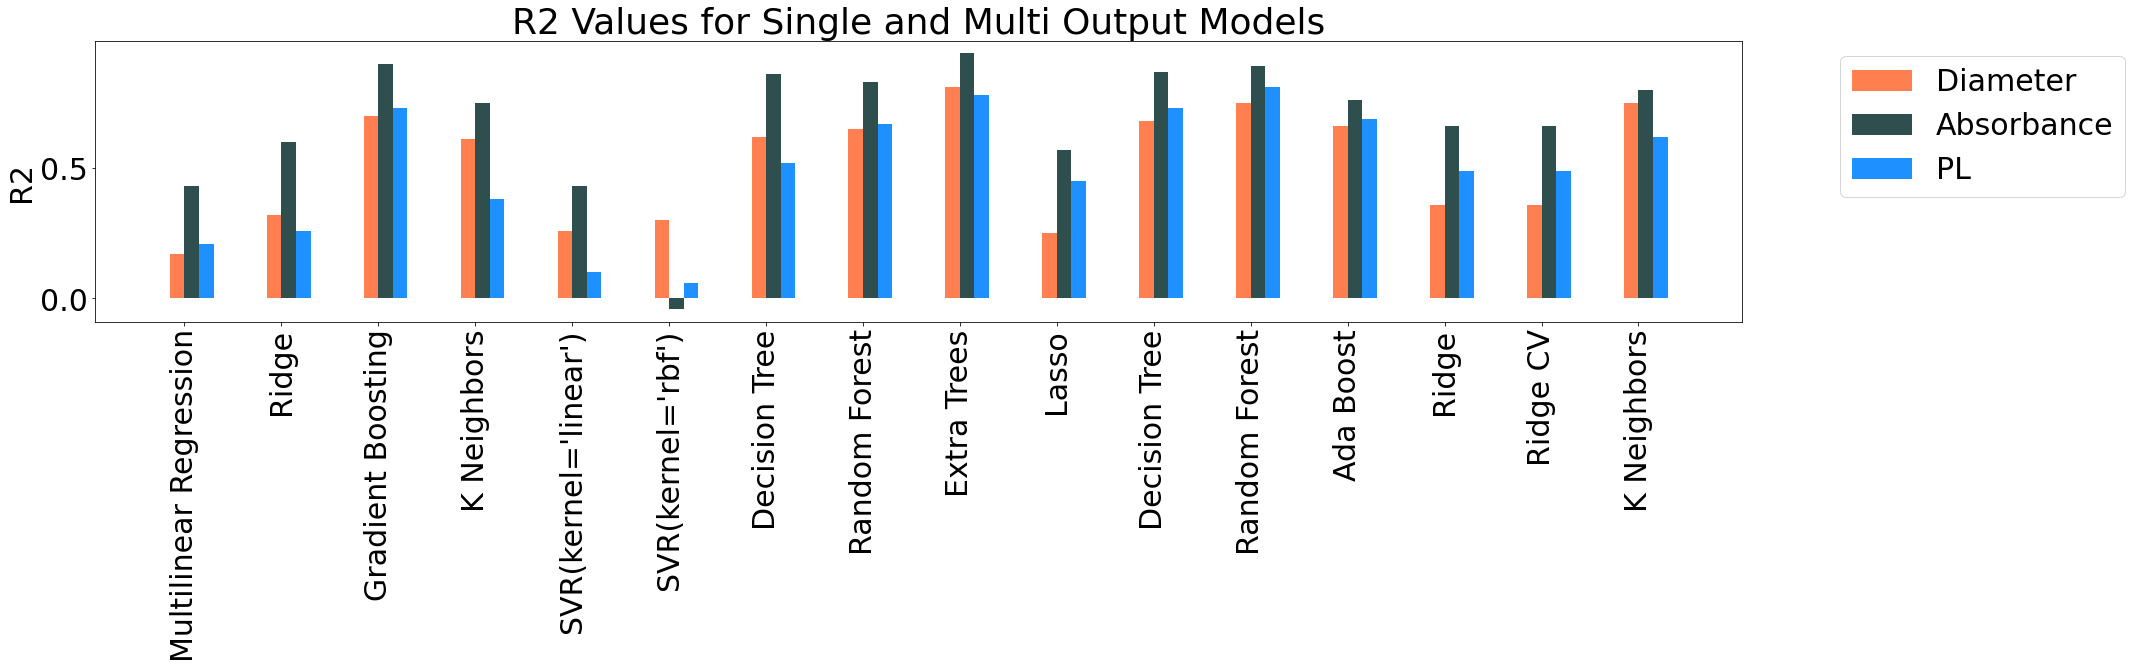

In [14]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
# Import plotting libraries
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 30})
from IPython.display import clear_output

df = pd.read_csv("Models_Metrics.csv")
df

fig, ax = plt.subplots(figsize=(25,10))
# The x-values of the bars.
models = df['Models']
x = np.arange(len(models))
# The width of the bars (1 = the whole width of the 'year group')
width = 0.15
# Create the bar charts!
ax.bar(x - width/2, df['R2_d'], width, label='Diameter', color='coral')
ax.bar(x + width/2, df['R2_ab'], width, label='Absorbance', color='darkslategray')
ax.bar(x + 3*width/2, df['R2_pl'], width, label='PL', color='dodgerblue')
ax.set_ylabel('R2')
ax.set_title('R2 Values for Single and Multi Output Models')
ax.set_xticks(x)    # This ensures we have one tick per year, otherwise we get fewer
ax.set_xticklabels(models.astype(str).values, rotation='vertical')
plt.tight_layout()
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

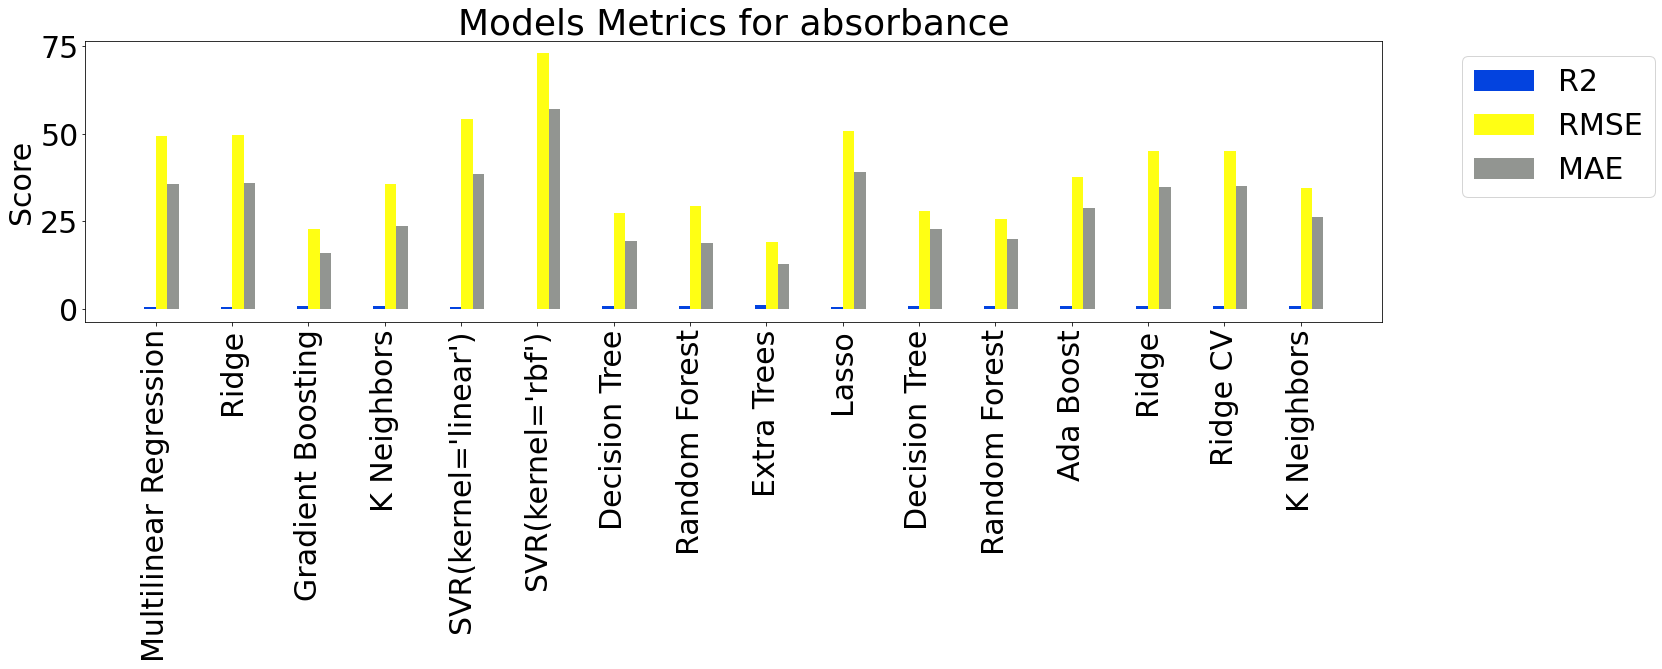

In [17]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
# Import plotting libraries
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 30})
from IPython.display import clear_output

df = pd.read_csv("Models_Metrics.csv")
df

fig, ax = plt.subplots(figsize=(20,10))
# The x-values of the bars.
models = df['Models']
x = np.arange(len(models))
# The width of the bars (1 = the whole width of the 'year group')
width = 0.15
# Create the bar charts!
ax.bar(x - width/2, df['R2_ab'], width, label='R2', color='#0343DF')
ax.bar(x + width/2, df['RMSE_ab'], width, label='RMSE', color='#FFFF14')
ax.bar(x + 3*width/2, df['MAE_ab'], width, label='MAE', color='#929591')
ax.set_ylabel('Score')
ax.set_title('Models Metrics for absorbance')
ax.set_xticks(x)    # This ensures we have one tick per year, otherwise we get fewer
ax.set_xticklabels(models.astype(str).values, rotation='vertical')
plt.tight_layout()
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

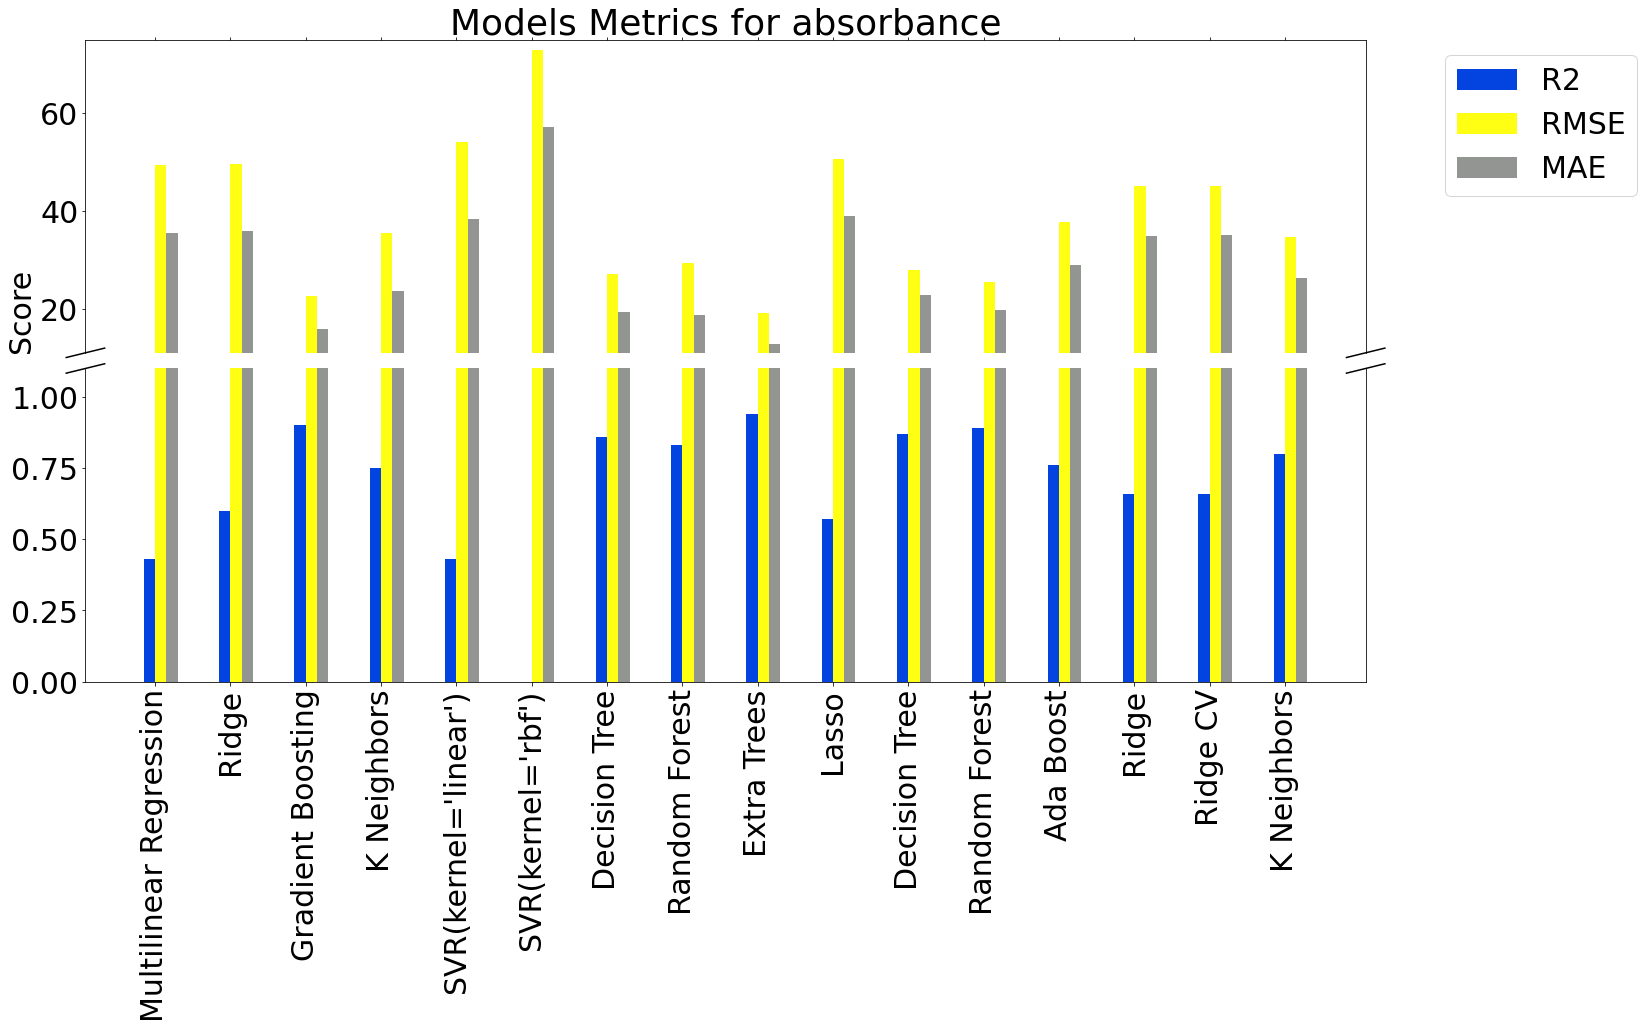

In [69]:
# Replotted the above but with cut off y-axis
f, (ax, ax2) = plt.subplots(2, 1, figsize=(20,15), sharex=True)
models = df['Models']
x = np.arange(len(models))
# The width of the bars (1 = the whole width of the 'year group')
width = 0.15
# Create the bar charts!
ax.bar(x - width/2, df['R2_ab'], width, label='R2', color='#0343DF')
ax.bar(x + width/2, df['RMSE_ab'], width, label='RMSE', color='#FFFF14')
ax.bar(x + 3*width/2, df['MAE_ab'], width, label='MAE', color='#929591')
ax2.bar(x - width/2, df['R2_ab'], width, label='R2', color='#0343DF')
ax2.bar(x + width/2, df['RMSE_ab'], width, label='RMSE', color='#FFFF14')
ax2.bar(x + 3*width/2, df['MAE_ab'], width, label='MAE', color='#929591')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(11, 75)  # outliers only
ax2.set_ylim(0, 1.1)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal



ax.set_ylabel('Score', loc="bottom")
ax.set_title('Models Metrics for absorbance')
ax.set_xticks(x)    # This ensures we have one tick per year, otherwise we get fewer
ax2.set_xticklabels(models.astype(str).values, rotation='vertical')
plt.tight_layout()
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
f.subplots_adjust(hspace=0.05)

plt.show()


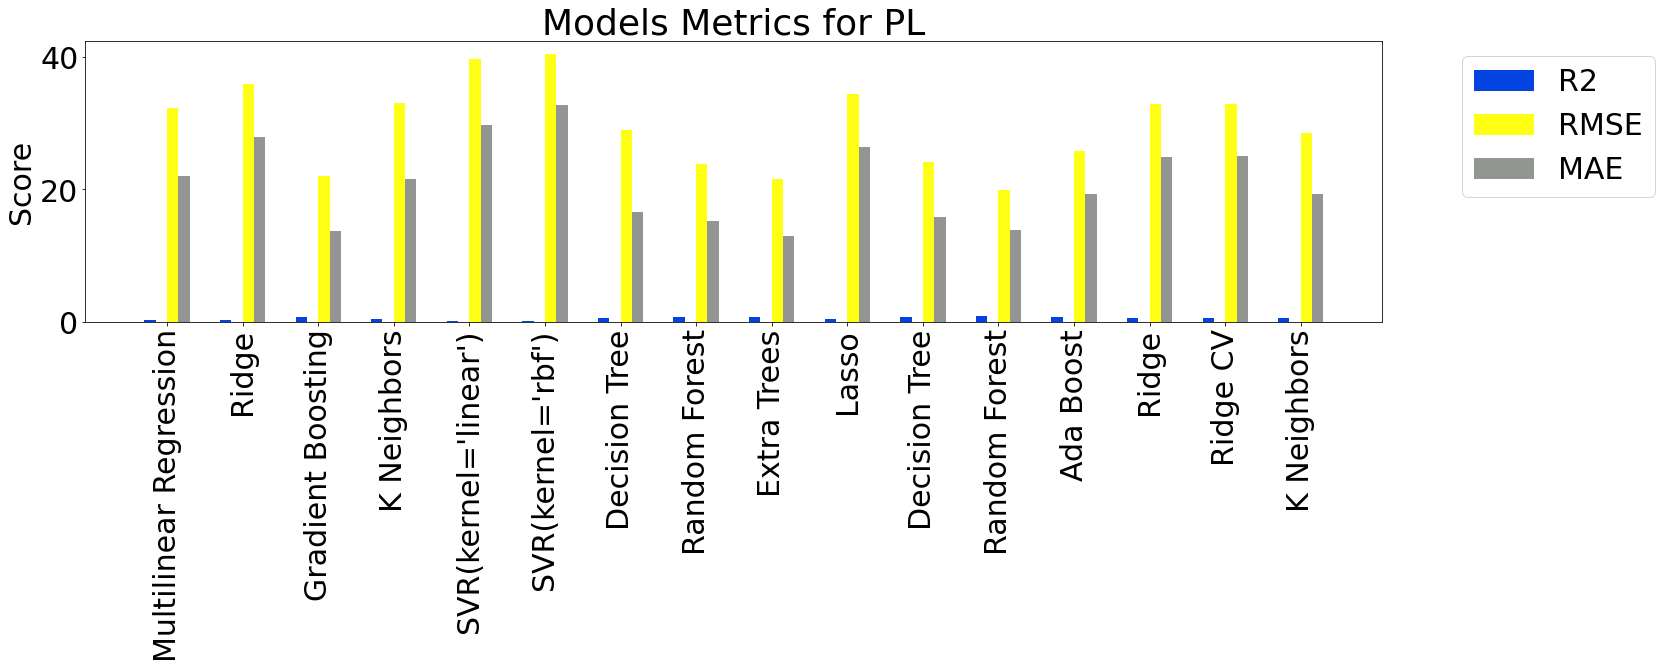

In [9]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
# Import plotting libraries
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 30})
from IPython.display import clear_output

df = pd.read_csv("Models_Metrics.csv")
df

fig, ax = plt.subplots(figsize=(20,10))
# The x-values of the bars.
models = df['Models']
x = np.arange(len(models))
# The width of the bars (1 = the whole width of the 'year group')
width = 0.15
# Create the bar charts!
rects1 = ax.bar(x - 3*width/2, df['R2_pl'], width, label='R2', color='#0343DF')
#ax.bar(x - width/2, df['MSE_pl'], width, label='MSE', color='#E50000')
rects2 = ax.bar(x + width/2, df['RMSE_pl'], width, label='RMSE', color='#FFFF14')
rects3 =ax.bar(x + 3*width/2, df['MAE_pl'], width, label='MAE', color='#929591')
ax.set_ylabel('Score')
ax.set_title('Models Metrics for PL')
ax.set_xticks(x)    # This ensures we have one tick per year, otherwise we get fewer
ax.set_xticklabels(models.astype(str).values, rotation='vertical')
plt.tight_layout()
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')




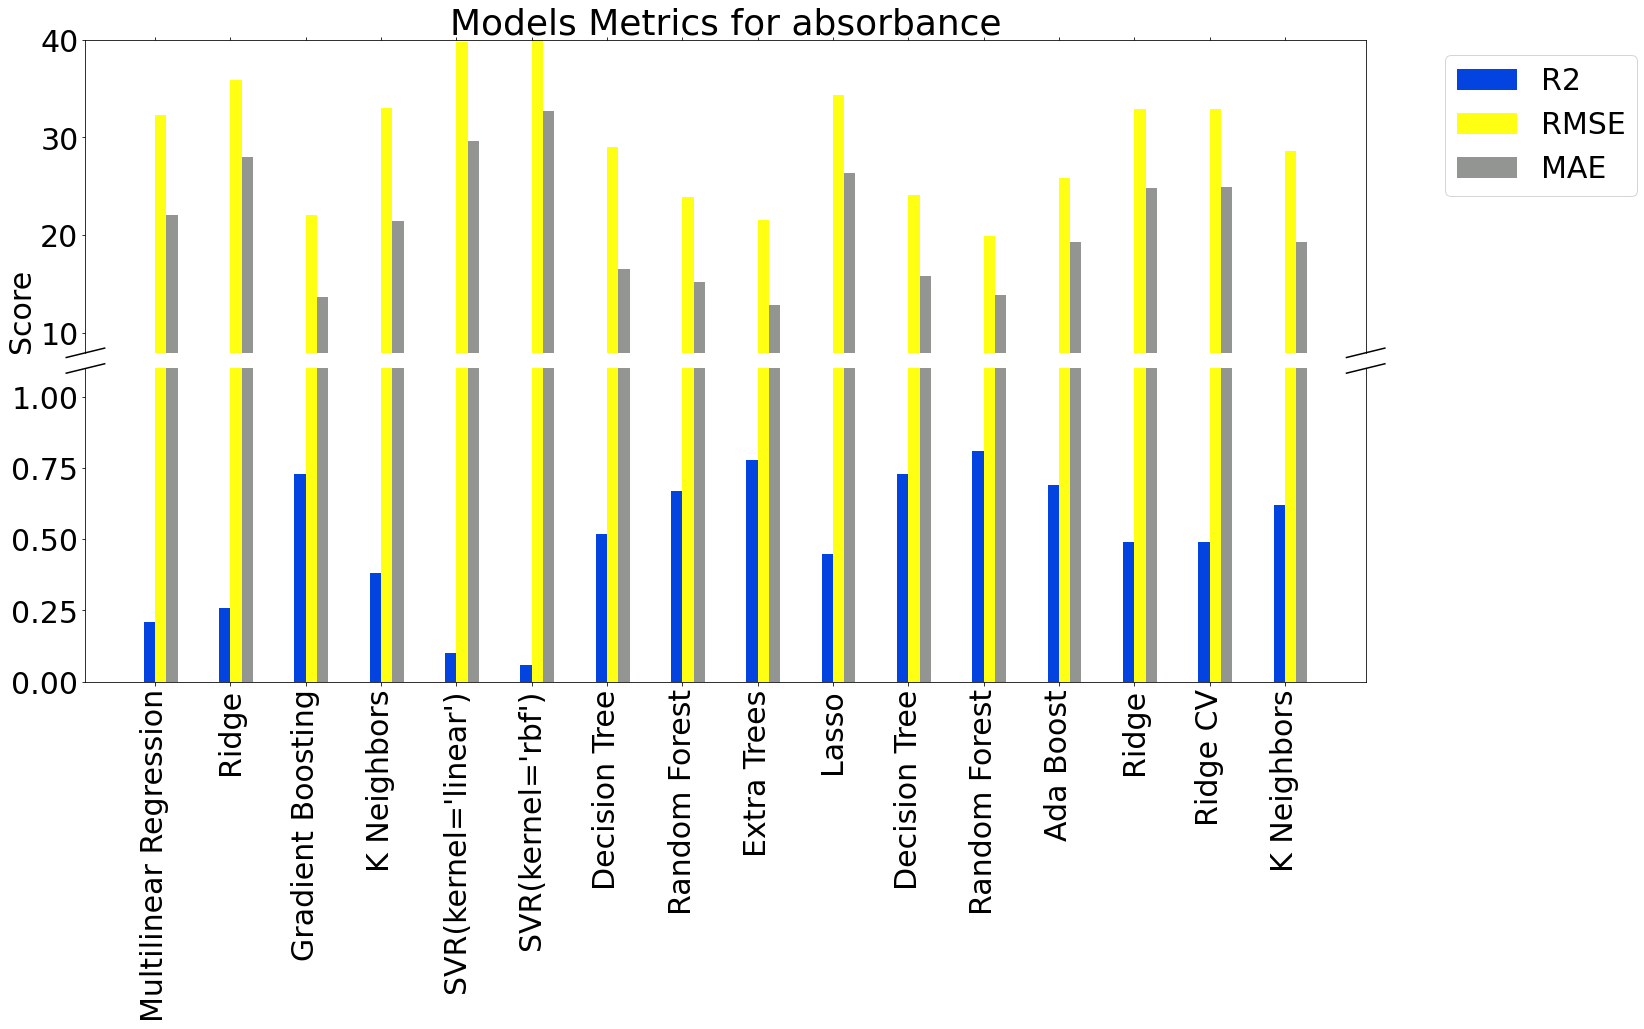

In [72]:
# Replotted the above but with cut off y-axis
f, (ax, ax2) = plt.subplots(2, 1, figsize=(20,15), sharex=True)
models = df['Models']
x = np.arange(len(models))
# The width of the bars (1 = the whole width of the 'year group')
width = 0.15
# Create the bar charts!
ax.bar(x - width/2, df['R2_pl'], width, label='R2', color='#0343DF')
ax.bar(x + width/2, df['RMSE_pl'], width, label='RMSE', color='#FFFF14')
ax.bar(x + 3*width/2, df['MAE_pl'], width, label='MAE', color='#929591')
ax2.bar(x - width/2, df['R2_pl'], width, label='R2', color='#0343DF')
ax2.bar(x + width/2, df['RMSE_pl'], width, label='RMSE', color='#FFFF14')
ax2.bar(x + 3*width/2, df['MAE_pl'], width, label='MAE', color='#929591')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(8, 40)  # outliers only
ax2.set_ylim(0, 1.1)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal



ax.set_ylabel('Score', loc="bottom")
ax.set_title('Models Metrics for absorbance')
ax.set_xticks(x)    # This ensures we have one tick per year, otherwise we get fewer
ax2.set_xticklabels(models.astype(str).values, rotation='vertical')
plt.tight_layout()
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
f.subplots_adjust(hspace=0.05)

plt.show()


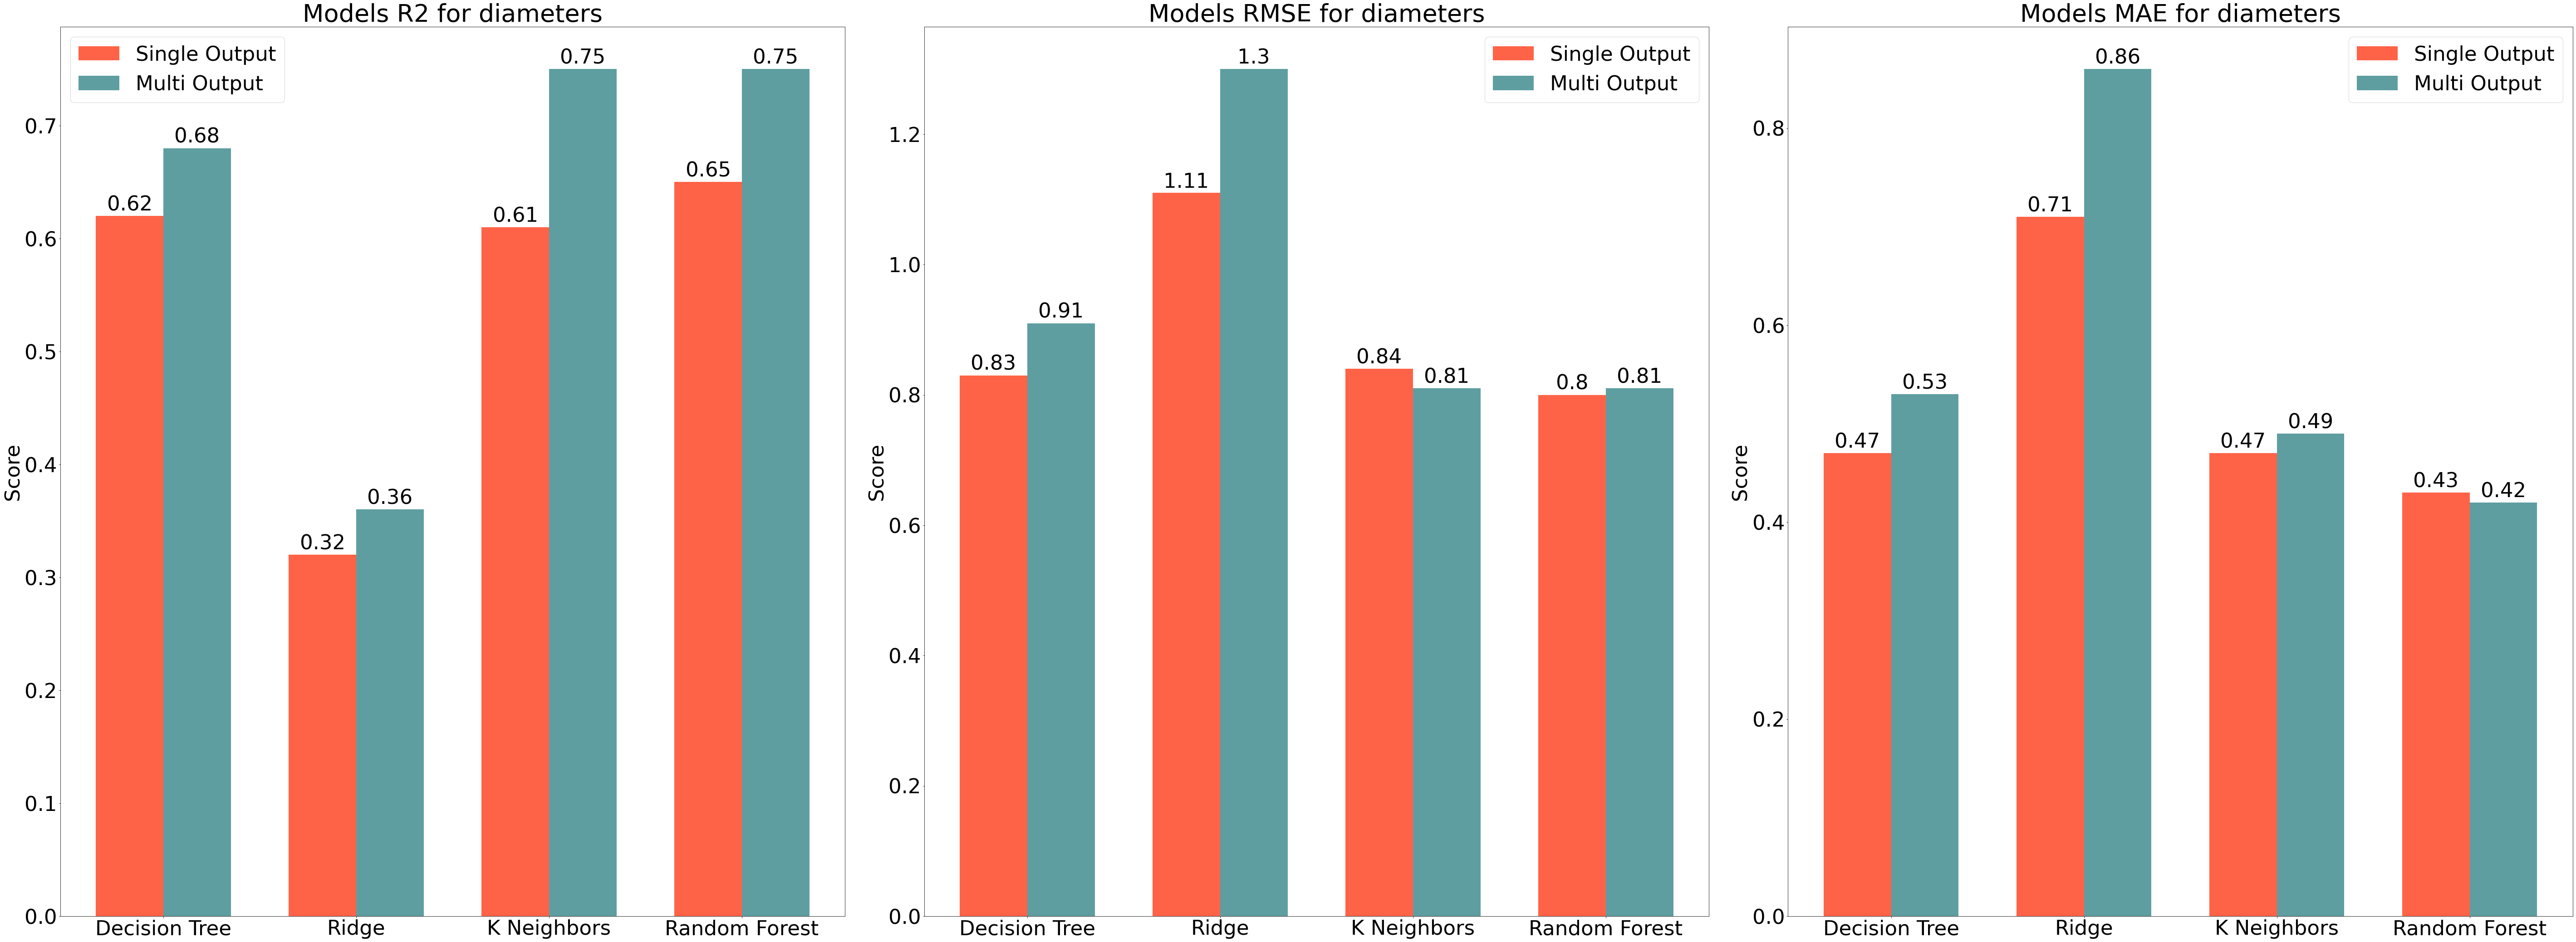

In [8]:
#create 3 figures of size 60x20
#figure will compare score metric for the diameter output
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
# Import plotting libraries
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 45})
from IPython.display import clear_output


labels = ['Decision Tree', 'Ridge', 'K Neighbors', 'Random Forest']
single_output_R2 = [df.iloc[6,2], df.iloc[1,2], df.iloc[3,2], df.iloc[7,2]]
multi_output_R2 = [df.iloc[10,2], df.iloc[13,2], df.iloc[15,2], df.iloc[11,2]]
#single_output_MSE = [df.iloc[6,5], df.iloc[1,5], df.iloc[3,5], df.iloc[7,5]]
#multi_output_MSE = [df.iloc[10,5], df.iloc[13,5], df.iloc[15,5], df.iloc[11,5]]
single_output_RMSE = [df.iloc[6,8], df.iloc[1,8], df.iloc[3,8], df.iloc[7,8]]
multi_output_RMSE = [df.iloc[10,8], df.iloc[13,8], df.iloc[15,8], df.iloc[11,8]]
single_output_MAE = [df.iloc[6,11], df.iloc[1,11], df.iloc[3,11], df.iloc[7,11]]
multi_output_MAE = [df.iloc[10,11], df.iloc[13,11], df.iloc[15,11], df.iloc[11,11]]
#fig, ax = plt.subplots()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(80,30), nrows = 1, ncols = 3)

rects1 = ax[0].bar(x - width/2, single_output_R2, width, label='Single Output', color='tomato')
rects2 = ax[0].bar(x + width/2, multi_output_R2, width, label='Multi Output',color='cadetblue')
ax[0].set_ylabel('Score')
ax[0].set_title('Models R2 for diameters')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[0].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

rects3 = ax[1].bar(x - width/2, single_output_RMSE, width, label='Single Output', color='tomato')
rects4 = ax[1].bar(x + width/2, multi_output_RMSE, width, label='Multi Output', color='cadetblue')
ax[1].set_ylabel('Score')
ax[1].set_title('Models RMSE for diameters')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[1].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects3)
autolabel(rects4)

rects5 = ax[2].bar(x - width/2, single_output_MAE, width, label='Single Output', color='tomato')
rects6 = ax[2].bar(x + width/2, multi_output_MAE, width, label='Multi Output', color='cadetblue')
ax[2].set_ylabel('Score')
ax[2].set_title('Models MAE for diameters')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels)
ax[2].legend()



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[2].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')




autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

plt.show()

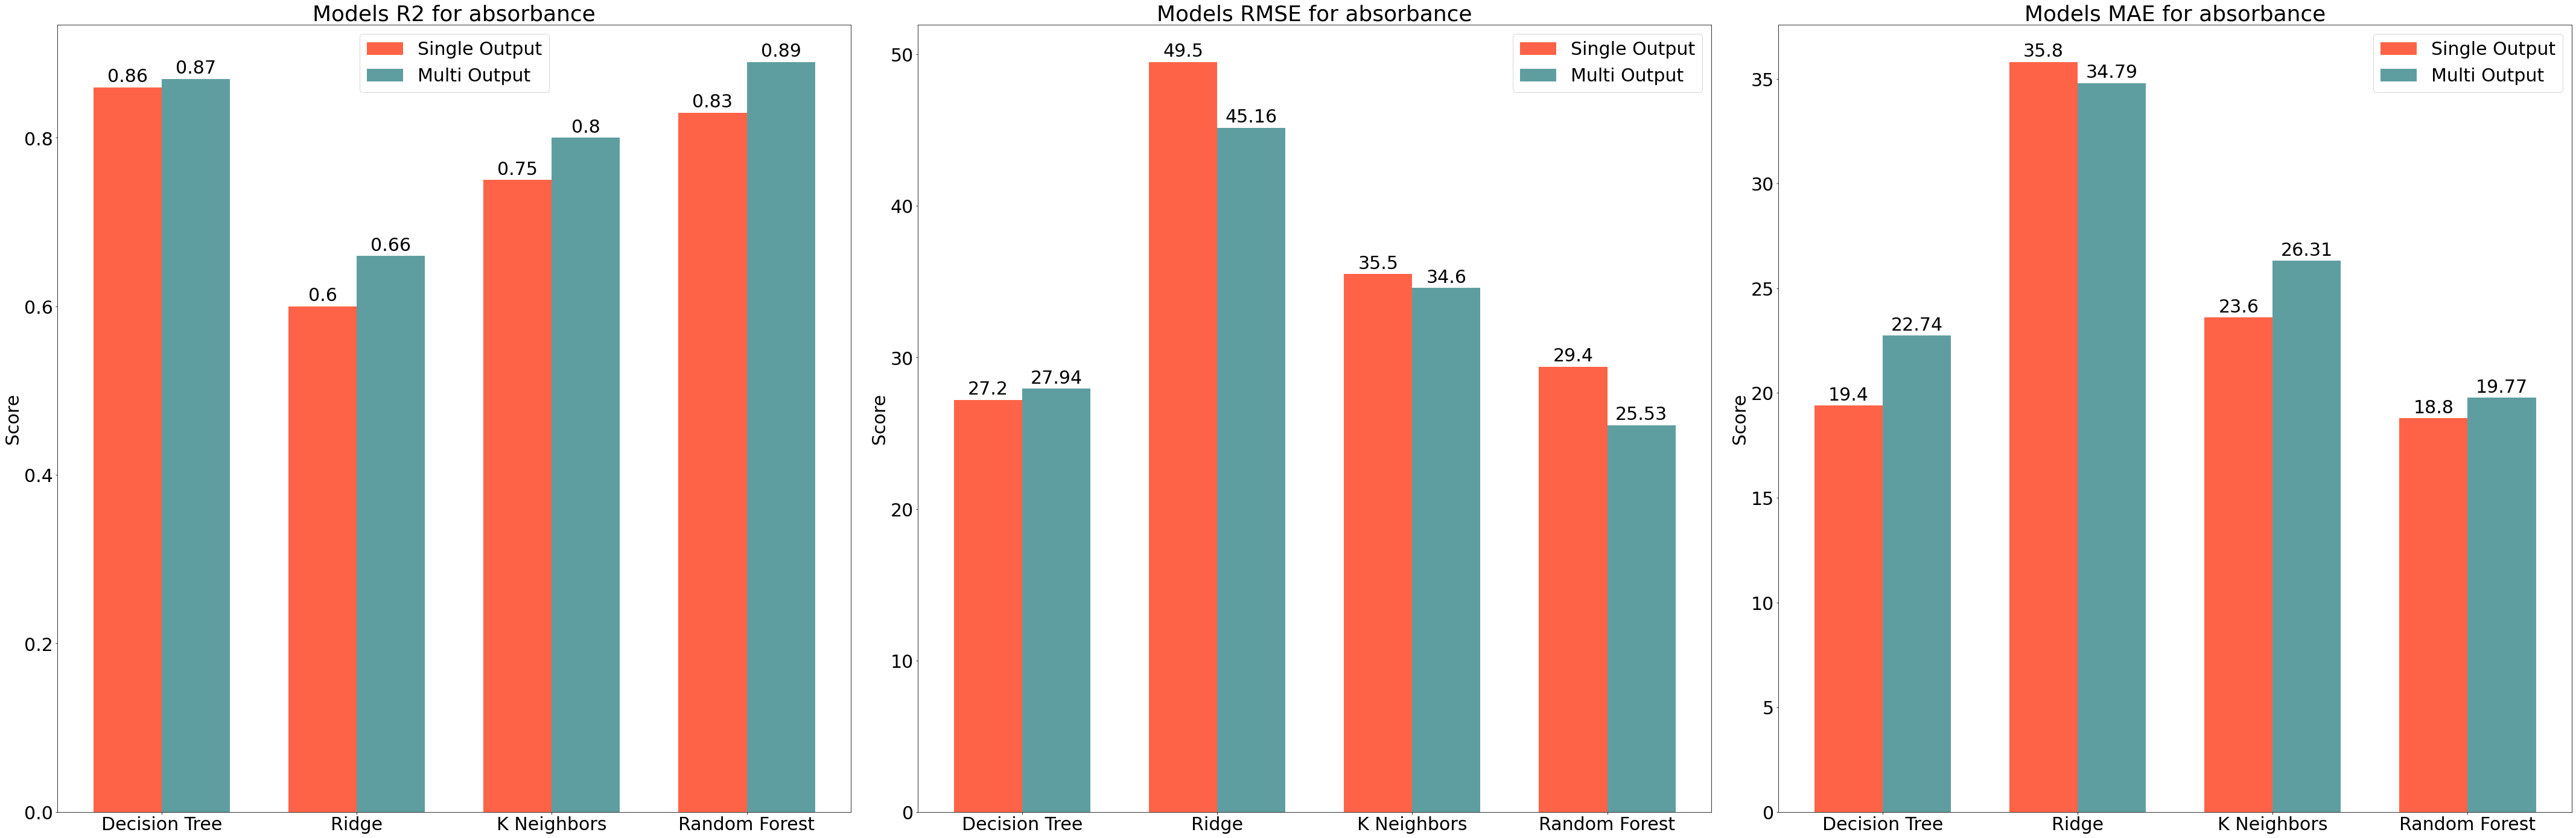

In [9]:
#create 3 figures of size 60x20
#figure will compare score metric for the absorbance output
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
# Import plotting libraries
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 30})
from IPython.display import clear_output


labels = ['Decision Tree', 'Ridge', 'K Neighbors', 'Random Forest']
single_output_R2 = [df.iloc[6,3], df.iloc[1,3], df.iloc[3,3], df.iloc[7,3]]
multi_output_R2 = [df.iloc[10,3], df.iloc[13,3], df.iloc[15,3], df.iloc[11,3]]
#single_output_MSE = [df.iloc[6,5], df.iloc[1,5], df.iloc[3,5], df.iloc[7,5]]
#multi_output_MSE = [df.iloc[10,5], df.iloc[13,5], df.iloc[15,5], df.iloc[11,5]]
single_output_RMSE = [df.iloc[6,9], df.iloc[1,9], df.iloc[3,9], df.iloc[7,9]]
multi_output_RMSE = [df.iloc[10,9], df.iloc[13,9], df.iloc[15,9], df.iloc[11,9]]
single_output_MAE = [df.iloc[6,12], df.iloc[1,12], df.iloc[3,12], df.iloc[7,12]]
multi_output_MAE = [df.iloc[10,12], df.iloc[13,12], df.iloc[15,12], df.iloc[11,12]]
#fig, ax = plt.subplots()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(60,20), nrows = 1, ncols = 3)

rects1 = ax[0].bar(x - width/2, single_output_R2, width, label='Single Output', color='tomato')
rects2 = ax[0].bar(x + width/2, multi_output_R2, width, label='Multi Output', color='cadetblue')
ax[0].set_ylabel('Score')
ax[0].set_title('Models R2 for absorbance')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[0].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

rects3 = ax[1].bar(x - width/2, single_output_RMSE, width, label='Single Output', color='tomato')
rects4 = ax[1].bar(x + width/2, multi_output_RMSE, width, label='Multi Output', color='cadetblue')
ax[1].set_ylabel('Score')
ax[1].set_title('Models RMSE for absorbance')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[1].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects3)
autolabel(rects4)

rects5 = ax[2].bar(x - width/2, single_output_MAE, width, label='Single Output', color='tomato')
rects6 = ax[2].bar(x + width/2, multi_output_MAE, width, label='Multi Output', color='cadetblue')
ax[2].set_ylabel('Score')
ax[2].set_title('Models MAE for absorbance')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels)
ax[2].legend()



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[2].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')




autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

plt.show()

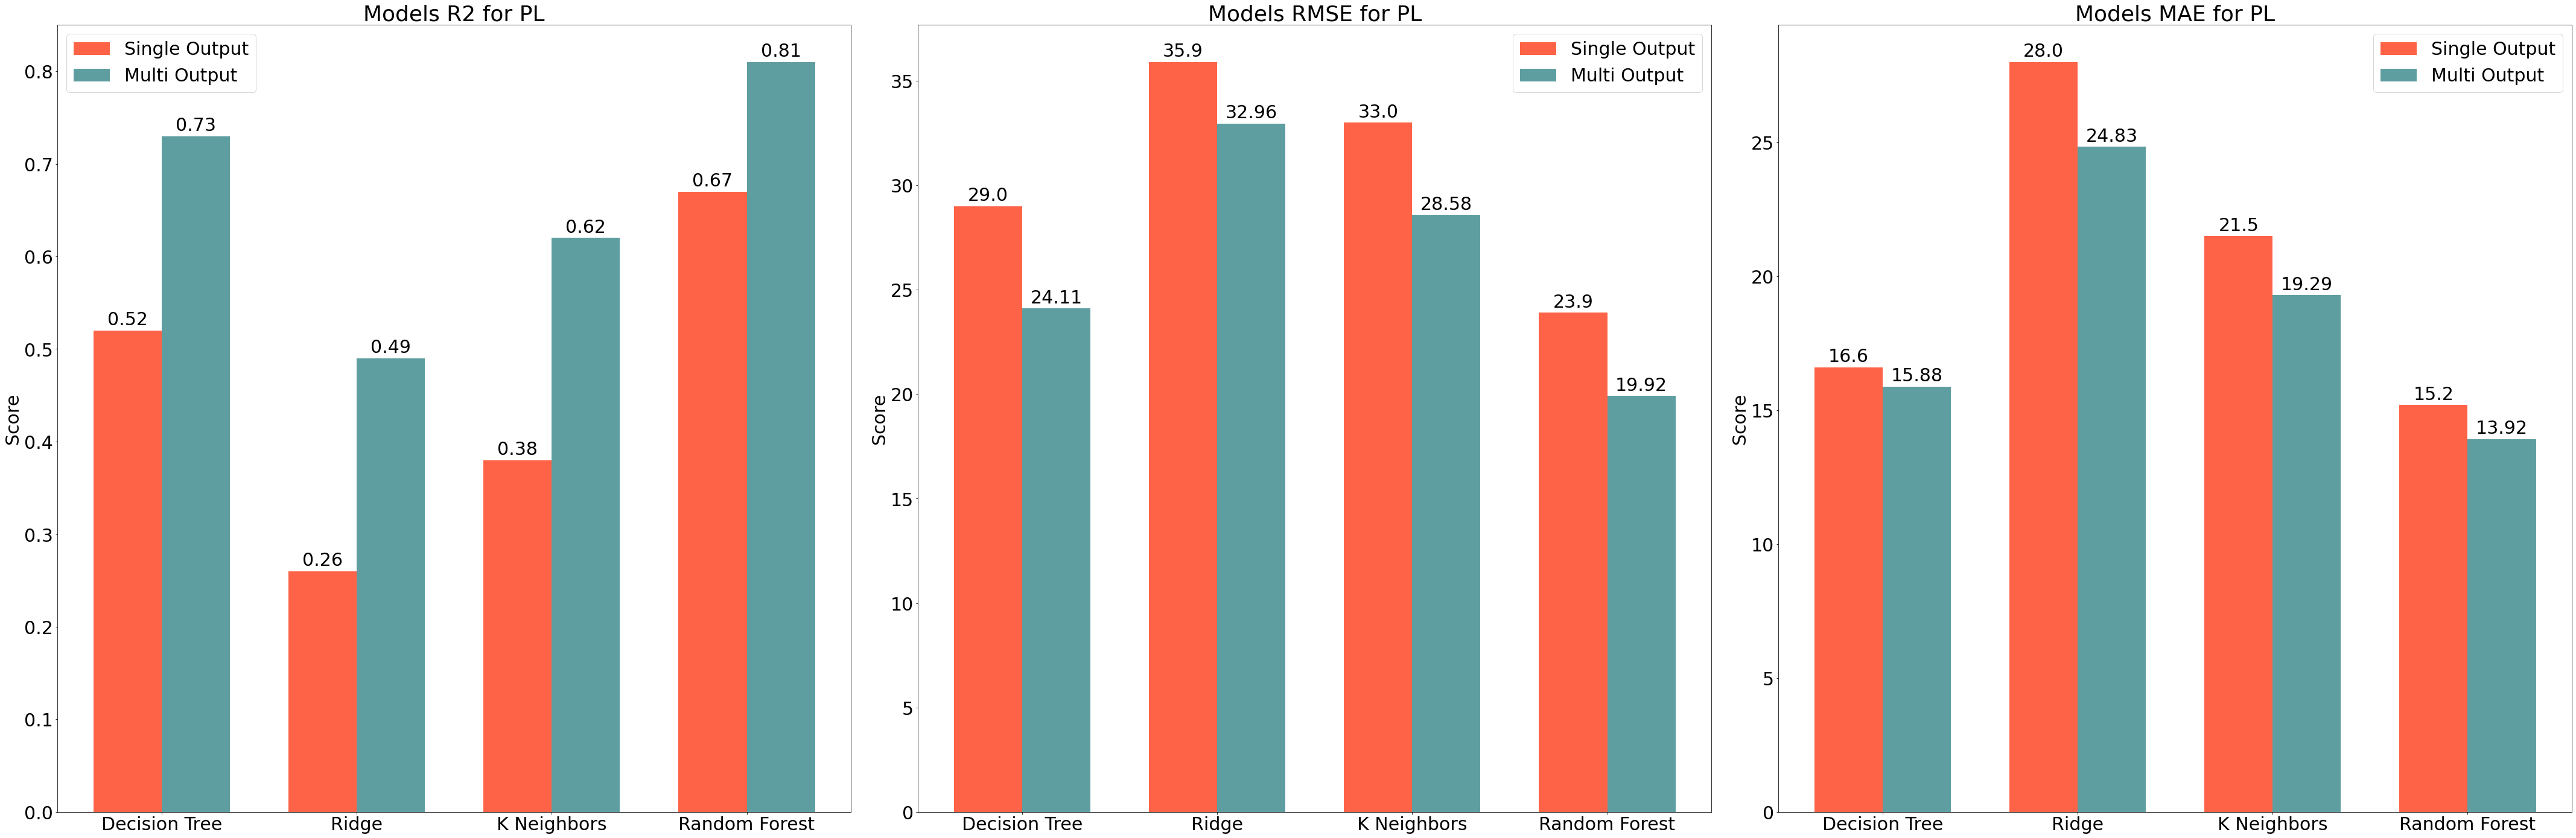

In [11]:
#create 3 figures of size 60x20
#figure will compare score metric for the PL output
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
# Import plotting libraries
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 30})
from IPython.display import clear_output


labels = ['Decision Tree', 'Ridge', 'K Neighbors', 'Random Forest']
single_output_R2 = [df.iloc[6,4], df.iloc[1,4], df.iloc[3,4], df.iloc[7,4]]
multi_output_R2 = [df.iloc[10,4], df.iloc[13,4], df.iloc[15,4], df.iloc[11,4]]
#single_output_MSE = [df.iloc[6,5], df.iloc[1,5], df.iloc[3,5], df.iloc[7,5]]
#multi_output_MSE = [df.iloc[10,5], df.iloc[13,5], df.iloc[15,5], df.iloc[11,5]]
single_output_RMSE = [df.iloc[6,10], df.iloc[1,10], df.iloc[3,10], df.iloc[7,10]]
multi_output_RMSE = [df.iloc[10,10], df.iloc[13,10], df.iloc[15,10], df.iloc[11,10]]
single_output_MAE = [df.iloc[6,13], df.iloc[1,13], df.iloc[3,13], df.iloc[7,13]]
multi_output_MAE = [df.iloc[10,13], df.iloc[13,13], df.iloc[15,13], df.iloc[11,13]]
#fig, ax = plt.subplots()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(60,20), nrows = 1, ncols = 3)

rects1 = ax[0].bar(x - width/2, single_output_R2, width, label='Single Output', color='tomato')
rects2 = ax[0].bar(x + width/2, multi_output_R2, width, label='Multi Output', color='cadetblue')
ax[0].set_ylabel('Score')
ax[0].set_title('Models R2 for PL')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[0].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

rects3 = ax[1].bar(x - width/2, single_output_RMSE, width, label='Single Output', color='tomato')
rects4 = ax[1].bar(x + width/2, multi_output_RMSE, width, label='Multi Output', color='cadetblue')
ax[1].set_ylabel('Score')
ax[1].set_title('Models RMSE for PL')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[1].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects3)
autolabel(rects4)

rects5 = ax[2].bar(x - width/2, single_output_MAE, width, label='Single Output', color='tomato')
rects6 = ax[2].bar(x + width/2, multi_output_MAE, width, label='Multi Output', color='cadetblue')
ax[2].set_ylabel('Score')
ax[2].set_title('Models MAE for PL')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels)
ax[2].legend()



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[2].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')




autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

plt.show()